<a href="https://colab.research.google.com/github/PR-2023/CECS550/blob/main/Prediction_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

import textwrap
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KernelDensity
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense


In [ ]:
Accuracy_score_array = []
Precision_score_array = []
Recall_score_array = []
F1_score_array = []
ROC_AUC_score_array = []
Confusion_matrix = []

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/CECS550/data_format1/train_complete_features.csv");

#Important features after feature ranking step

MI_selected_columns=['label','user_merchant_cat_count', 'user_merchant_brand_count', 'activity_count', 'user_id', 'user_merchant_day_cat_count', 'click_count', 'merchant_cat_count', 'merchant_id', 'brand_id', 'cat_id', 'item_id', 'purchase_count', 'Month', 'favourite_count', 'merchant_brand_count', 'user_brand_count', 'user_gender_female', 'user_cat_count', 'age_35_39', 'user_gender_unknown']
len_MI_selected_columns=17

rf_selected_columns=['label','user_id', 'user_merchant_brand_count', 'user_merchant_cat_count', 'activity_count', 'user_merchant_day_cat_count', 'click_count', 'merchant_id', 'Day', 'brand_id', 'Month', 'cat_id', 'merchant_brand_count', 'merchant_cat_count', 'user_gender_unknown', 'item_id', 'age_30_34', 'age_35_39', 'age_40_49', 'age_25_29', 'user_merchant_count', 'user_gender_female']
len_rf_selected_columns=19

xgb_selected_columns=['label','click_count', 'merchant_brand_count', 'activity_count', 'age_40_49', 'Day', 'age_30_34', 'merchant_id', 'user_id', 'user_cat_count', 'user_merchant_day_cat_count', 'item_id', 'age_35_39', 'brand_id', 'cat_id', 'age_25_29', 'merchant_cat_count']
len_xgb_selected_columns=16

permutation_selected_columns=['label','activity_count', 'user_merchant_brand_count', 'merchant_id', 'user_id', 'item_id', 'merchant_brand_count', 'age_30_34']
len_permutation_selected_columns=7

# ['click_count', 'activity_count', 'merchant_brand_count', 'user_id', 'user_merchant_brand_count', 'age_40_49', 'user_merchant_cat_count', 'merchant_id', 'Day', 'user_merchant_day_cat_count']

combined_selected_columns=['item_id', 'cat_id', 'merchant_id', 'brand_id', 'action_type', 'Day', 'Month', 'activity_count', 'click_count', 'add_to_cart_count', 'purchase_count', 'favourite_count', 'user_gender_female', 'user_gender_male', 'user_gender_unknown', 'user_Click', 'user_Add_to_cart', 'user_purchase', 'user_Add_to_favorite', 'age_0_18', 'age_18_24', 'age_25_29', 'age_30_34', 'age_35_39', 'age_40_49', 'merchant_item_count', 'merchant_brand_count', 'merchant_cat_count', 'user_merchant_count', 'user_cat_count', 'user_brand_count', 'user_merchant_brand_count', 'user_merchant_cat_count', 'user_merchant_day_cat_count', 'label']
len_combined_selected_columns = 15

data_1 = data[MI_selected_columns]
data_2 = data[rf_selected_columns]
data_3 = data[xgb_selected_columns]
data_4 = data[permutation_selected_columns]
data_5 = data[combined_selected_columns]


In [ ]:
#Check if NA values are there in dataset
data_1.isna().any()
data_1.fillna(0, inplace=True)
data_1.isna().any()

data_2.isna().any()
data_2.fillna(0, inplace=True)
data_2.isna().any()

data_3.isna().any()
data_3.fillna(0, inplace=True)
data_3.isna().any()

data_4.isna().any()
data_4.fillna(0, inplace=True)
data_4.isna().any()

data_5.isna().any()
data_5.fillna(0, inplace=True)
data_5.isna().any()

<ipython-input-4-699ad7ac5cf9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1.fillna(0, inplace=True)
<ipython-input-4-699ad7ac5cf9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2.fillna(0, inplace=True)
<ipython-input-4-699ad7ac5cf9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3.fillna(0, inplace=True)
<ipython-input-4-699ad7ac5cf9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

item_id                        False
cat_id                         False
merchant_id                    False
brand_id                       False
action_type                    False
Day                            False
Month                          False
activity_count                 False
click_count                    False
add_to_cart_count              False
purchase_count                 False
favourite_count                False
user_gender_female             False
user_gender_male               False
user_gender_unknown            False
user_Click                     False
user_Add_to_cart               False
user_purchase                  False
user_Add_to_favorite           False
age_0_18                       False
age_18_24                      False
age_25_29                      False
age_30_34                      False
age_35_39                      False
age_40_49                      False
merchant_item_count            False
merchant_brand_count           False
m

In [ ]:
#Divide data into given and predicition datasets
def divide_data_x_y(data):
    X = data.drop(columns=['label'])
    y = data['label']
    return X, y
X1, y1 = divide_data_x_y(data_1)
X2, y2 = divide_data_x_y(data_2)
X3, y3 = divide_data_x_y(data_3)
X4, y4 = divide_data_x_y(data_4)
X5, y5 = divide_data_x_y(data_5)

In [ ]:
#Split data into train and test dataset
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.2, random_state=1, stratify=y1)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.2, random_state=1, stratify=y2)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X3, y3, test_size=0.2, random_state=1, stratify=y3)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X4, y4, test_size=0.2, random_state=1, stratify=y4)
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X5, y5, test_size=0.2, random_state=1, stratify=y5)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed_1 = imputer.fit_transform(X1)
X_imputed_2 = imputer.fit_transform(X2)
X_imputed_3 = imputer.fit_transform(X3)
X_imputed_4 = imputer.fit_transform(X4)
X_imputed_5 = imputer.fit_transform(X5)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled_1 = scaler.fit_transform(X_imputed_1)
X_scaled_2 = scaler.fit_transform(X_imputed_2)
X_scaled_3 = scaler.fit_transform(X_imputed_3)
X_scaled_4 = scaler.fit_transform(X_imputed_4)
X_scaled_5 = scaler.fit_transform(X_imputed_5)

In [ ]:
#Calulate various scores
def calculate_model_scores(accuracyScore, precisionScore, recallScore, f1Score, confusion, roc, roc_auc, model_name, displayPlotsOutput=True, displayTableOutput=True):
    confusionMatrix = confusion
    roc_data = [roc, roc_auc]
    model_name = model_name

    if displayTableOutput:
      table_data = {'Accuracy_Score': accuracyScore,
      'Precision_Score': precisionScore, 'Recall_Score': recallScore, 'F1 Score': f1Score, 'ROC AUC Score': roc_auc} 
      table_frame = pd.DataFrame(table_data, index=[str(model_name)])
      print(table_frame.to_markdown()) 
    
    if displayPlotsOutput:
        fig, ax = plt.subplots()
        fpr, tpr, thresholds = roc
        roc_plot = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_name)
        roc_plot.plot(ax=ax)
        print("\n")
        ax.set_title('ROC Curve of '+str(model_name))
        plt.show()

        conf_plot = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)
        conf_plot.plot()
        plt.title("Confusion Matrix of "+str(model_name))
        plt.show()

In [ ]:
#fit dataset into model
def model_fit(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  aa = predict(model, X_test, y_train, y_test)

def predict(model, X_test, y_train, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    accuracyScore = accuracy_score(y_test, y_pred)
    precisionScore = precision_score(y_test, y_pred)
    recallScore = recall_score(y_test, y_pred)
    f1Score = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    roc = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)

    Accuracy_score_array.append(accuracyScore)
    Precision_score_array.append(precisionScore)
    Recall_score_array.append(recallScore)
    F1_score_array.append(f1Score)
    ROC_AUC_score_array.append(roc_auc)
    Confusion_matrix.append(confusion)
    
    calculate_model_scores(accuracyScore, precisionScore, recallScore, f1Score, confusion, roc, roc_auc, model)

# **PCA model**

|                                        |   Accuracy_Score |   Precision_Score |   Recall_Score |   F1 Score |   ROC AUC Score |
|:---------------------------------------|-----------------:|------------------:|---------------:|-----------:|----------------:|
| RandomForestClassifier(random_state=0) |         0.990937 |              0.75 |          0.375 |        0.5 |        0.994075 |




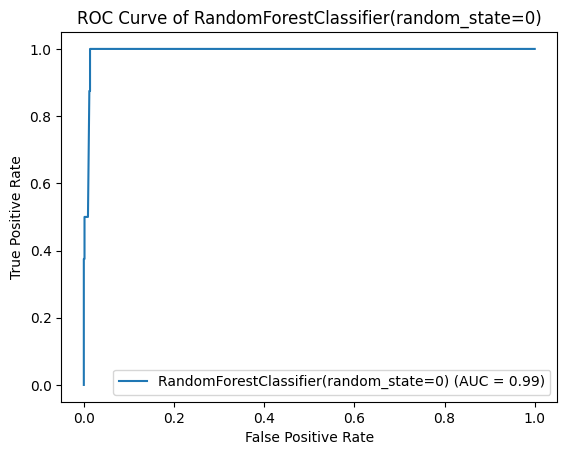

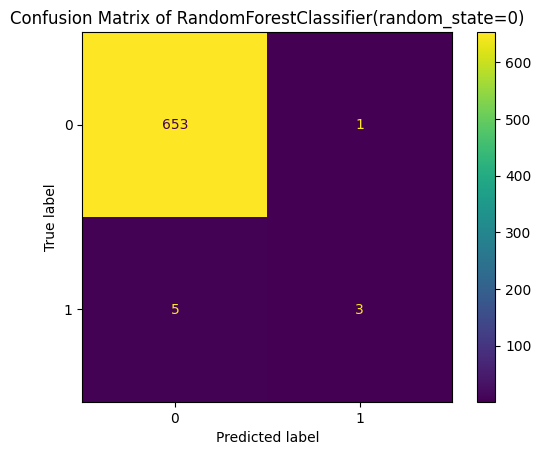

|                                        |   Accuracy_Score |   Precision_Score |   Recall_Score |   F1 Score |   ROC AUC Score |
|:---------------------------------------|-----------------:|------------------:|---------------:|-----------:|----------------:|
| RandomForestClassifier(random_state=0) |         0.993958 |          0.833333 |          0.625 |   0.714286 |        0.998089 |




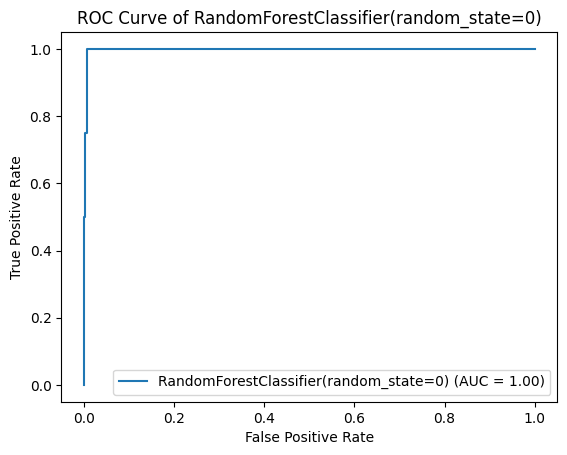

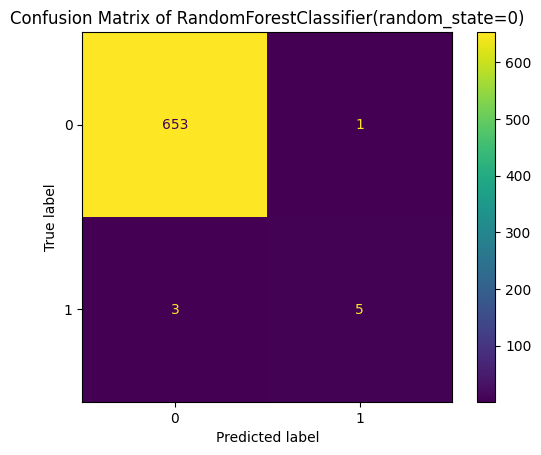

|                                        |   Accuracy_Score |   Precision_Score |   Recall_Score |   F1 Score |   ROC AUC Score |
|:---------------------------------------|-----------------:|------------------:|---------------:|-----------:|----------------:|
| RandomForestClassifier(random_state=0) |         0.995468 |          0.857143 |           0.75 |        0.8 |        0.996369 |




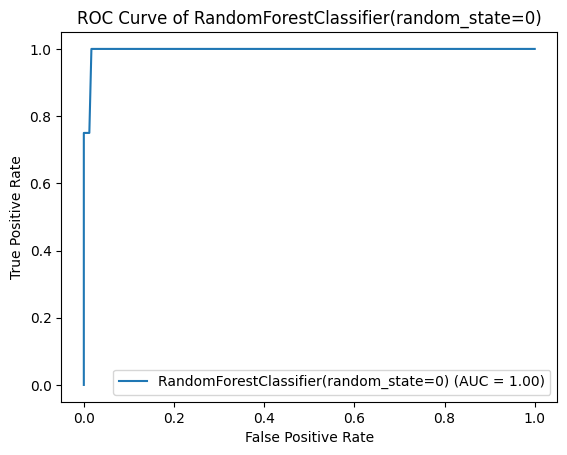

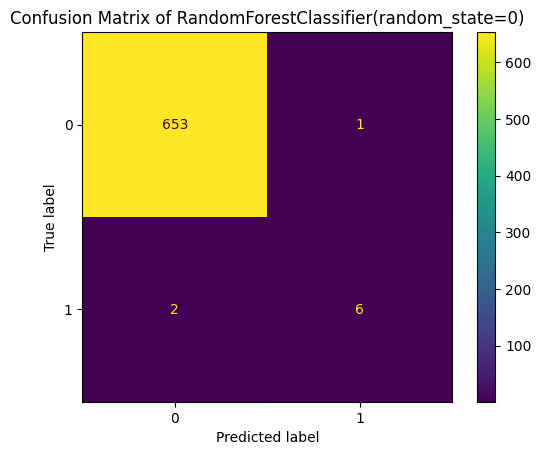

|                                        |   Accuracy_Score |   Precision_Score |   Recall_Score |   F1 Score |   ROC AUC Score |
|:---------------------------------------|-----------------:|------------------:|---------------:|-----------:|----------------:|
| RandomForestClassifier(random_state=0) |         0.996979 |                 1 |           0.75 |   0.857143 |        0.998662 |




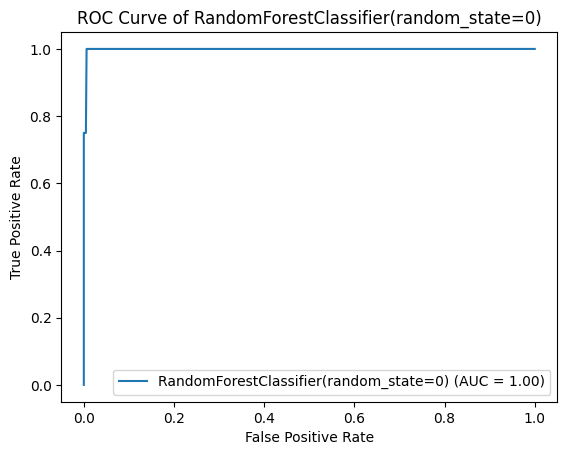

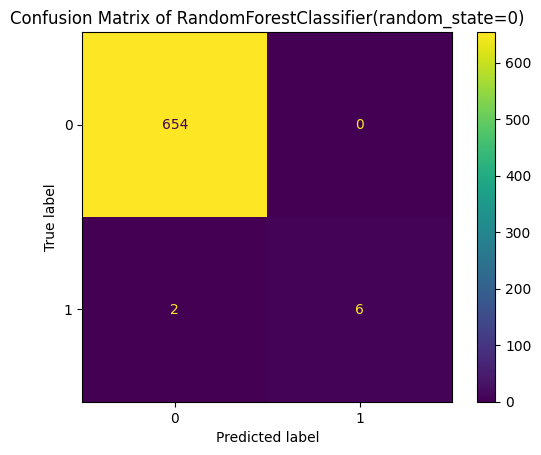

|                                        |   Accuracy_Score |   Precision_Score |   Recall_Score |   F1 Score |   ROC AUC Score |
|:---------------------------------------|-----------------:|------------------:|---------------:|-----------:|----------------:|
| RandomForestClassifier(random_state=0) |         0.993958 |                 1 |            0.5 |   0.666667 |        0.997515 |




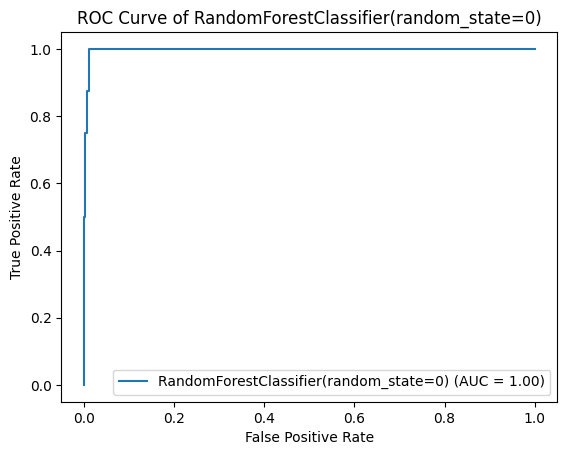

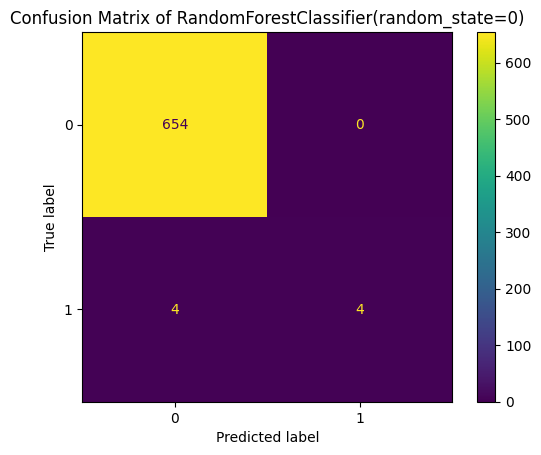

In [ ]:
X_train_11, X_test_11, y_train_11, y_test_11 = train_test_split(X_scaled_1, y1, test_size=0.2, random_state=1, stratify=y1)
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(X_scaled_2, y2, test_size=0.2, random_state=1, stratify=y2)
X_train_33, X_test_33, y_train_33, y_test_33 = train_test_split(X_scaled_3, y3, test_size=0.2, random_state=1, stratify=y3)
X_train_44, X_test_44, y_train_44, y_test_44 = train_test_split(X_scaled_4, y4, test_size=0.2, random_state=1, stratify=y4)
X_train_55, X_test_55, y_train_55, y_test_55 = train_test_split(X_scaled_5, y5, test_size=0.2, random_state=1, stratify=y5)

def PCA_func(X_train, X_test, ab):
  pca = PCA(n_components=ab)
  X_train_pca = pca.fit_transform(X_train)
  X_test_pca = pca.transform(X_test)
  return X_train_pca, X_test_pca

X_train_pca_11, X_test_pca_11 = PCA_func(X_train_11, X_test_11, len_MI_selected_columns)
X_train_pca_22, X_test_pca_22 = PCA_func(X_train_22, X_test_22, len_rf_selected_columns)
X_train_pca_33, X_test_pca_33 = PCA_func(X_train_33, X_test_33, len_xgb_selected_columns)
X_train_pca_44, X_test_pca_44 = PCA_func(X_train_44, X_test_44, len_permutation_selected_columns)
X_train_pca_55, X_test_pca_55 = PCA_func(X_train_55, X_test_55, len_combined_selected_columns)

model_fit(RandomForestClassifier(random_state=0), X_train_pca_11, X_test_pca_11, y_train_11, y_test_11)
model_fit(RandomForestClassifier(random_state=0), X_train_pca_22, X_test_pca_22, y_train_22, y_test_22)
model_fit(RandomForestClassifier(random_state=0), X_train_pca_33, X_test_pca_33, y_train_33, y_test_33)
model_fit(RandomForestClassifier(random_state=0), X_train_pca_44, X_test_pca_44, y_train_44, y_test_44)
model_fit(RandomForestClassifier(random_state=0), X_train_pca_55, X_test_pca_55, y_train_55, y_test_55)


In [ ]:
Accuracy_score_array_dt_1 = []
Accuracy_score_array_dt_2 = []
Accuracy_score_array_dt_3 = []
Accuracy_score_array_dt_4 = []
Accuracy_score_array_dt_5 = []

Precision_score_array_dt_1 = []
Precision_score_array_dt_2 = []
Precision_score_array_dt_3 = []
Precision_score_array_dt_4 = []
Precision_score_array_dt_5 = []

Recall_score_array_dt_1 = []
Recall_score_array_dt_2 = []
Recall_score_array_dt_3 = []
Recall_score_array_dt_4 = []
Recall_score_array_dt_5 = []

F1_score_array_dt_1 = []
F1_score_array_dt_2 = []
F1_score_array_dt_3 = []
F1_score_array_dt_4 = []
F1_score_array_dt_5 = []

ROC_AUC_score_array_dt_1 = []
ROC_AUC_score_array_dt_2 = []
ROC_AUC_score_array_dt_3 = []
ROC_AUC_score_array_dt_4 = []
ROC_AUC_score_array_dt_5 = []

# Confusion_matrix_dt_1 = []
# Confusion_matrix_dt_2 = []
# Confusion_matrix_dt_3 = []
# Confusion_matrix_dt_4 = []
# Confusion_matrix_dt_5 = []

In [ ]:
print(Accuracy_score_array)
print(Precision_score_array)
print(Recall_score_array)
print(F1_score_array)
print(ROC_AUC_score_array)

[0.9909365558912386, 0.9939577039274925, 0.9954682779456193, 0.9969788519637462, 0.9939577039274925]
[0.75, 0.8333333333333334, 0.8571428571428571, 1.0, 1.0]
[0.375, 0.625, 0.75, 0.75, 0.5]
[0.5, 0.7142857142857143, 0.7999999999999999, 0.8571428571428571, 0.6666666666666666]
[0.9940749235474006, 0.9980886850152905, 0.996368501529052, 0.9986620795107034, 0.9975152905198776]


In [ ]:
Accuracy_score_array_dt_1.append(Accuracy_score_array[0])
Accuracy_score_array_dt_2.append(Accuracy_score_array[1])
Accuracy_score_array_dt_3.append(Accuracy_score_array[2])
Accuracy_score_array_dt_4.append(Accuracy_score_array[3])
Accuracy_score_array_dt_5.append(Accuracy_score_array[4])
Accuracy_score_array = []

Precision_score_array_dt_1.append(Precision_score_array[0])
Precision_score_array_dt_2.append(Precision_score_array[1])
Precision_score_array_dt_3.append(Precision_score_array[2])
Precision_score_array_dt_4.append(Precision_score_array[3])
Precision_score_array_dt_5.append(Precision_score_array[4])
Precision_score_array = []

Recall_score_array_dt_1.append(Recall_score_array[0])
Recall_score_array_dt_2.append(Recall_score_array[1])
Recall_score_array_dt_3.append(Recall_score_array[2])
Recall_score_array_dt_4.append(Recall_score_array[3])
Recall_score_array_dt_5.append(Recall_score_array[4])
Recall_score_array = []

F1_score_array_dt_1.append(F1_score_array[0])
F1_score_array_dt_2.append(F1_score_array[1])
F1_score_array_dt_3.append(F1_score_array[2])
F1_score_array_dt_4.append(F1_score_array[3])
F1_score_array_dt_5.append(F1_score_array[4])
F1_score_array = []

ROC_AUC_score_array_dt_1.append(ROC_AUC_score_array[0])
ROC_AUC_score_array_dt_2.append(ROC_AUC_score_array[1])
ROC_AUC_score_array_dt_3.append(ROC_AUC_score_array[2])
ROC_AUC_score_array_dt_4.append(ROC_AUC_score_array[3])
ROC_AUC_score_array_dt_5.append(ROC_AUC_score_array[4])
ROC_AUC_score_array = []

# Confusion_matrix_dt_1 = Confusion_matrix[0]
# Confusion_matrix_dt_2 = Confusion_matrix[1]
# Confusion_matrix_dt_3 = Confusion_matrix[2]
# Confusion_matrix_dt_4 = Confusion_matrix[3]
# Confusion_matrix_dt_5 = Confusion_matrix[4]
# Confusion_matrix = []


# for i in Accuracy_score_array:
#   Accuracy_score_array_dt_1.append(i)
# for j in Precision_score_array:
#   Precision_score_array_final.append(j)
# for k in Recall_score_array:
#     Recall_score_array.append(k)
# for l in F1_score_array:
#   F1_score_array_final.append(l)
# for m in ROC_AUC_score_array:
#   ROC_AUC_score_array_final.append(m)
# for n in Confusion_matrix:
#   Confusion_matrix_final.append(n)

# Accuracy_score_array_pca_1 = Accuracy_score_array
# Precision_score_array_pca_1 = Precision_score_array
# Recall_score_array_pca_1 = Recall_score_array
# F1_score_array_pca_1 = F1_score_array
# ROC_AUC_score_array_pca_1 = ROC_AUC_score_array

# Accuracy_score_array = []
# Precision_score_array = []
# Recall_score_array = []
# F1_score_array = []
# ROC_AUC_score_array = []

In [ ]:
print(Accuracy_score_array)
print(Precision_score_array)
print(Recall_score_array)
print(F1_score_array)
print(ROC_AUC_score_array)
print(Accuracy_score_array_dt_1)
# print(Confusion_matrix_dt_1)

[]
[]
[]
[]
[]
[0.9909365558912386]


# **Random Forest Classifier**

|                                        |   Accuracy_Score |   Precision_Score |   Recall_Score |   F1 Score |   ROC AUC Score |
|:---------------------------------------|-----------------:|------------------:|---------------:|-----------:|----------------:|
| RandomForestClassifier(random_state=0) |         0.990937 |              0.75 |          0.375 |        0.5 |        0.993597 |




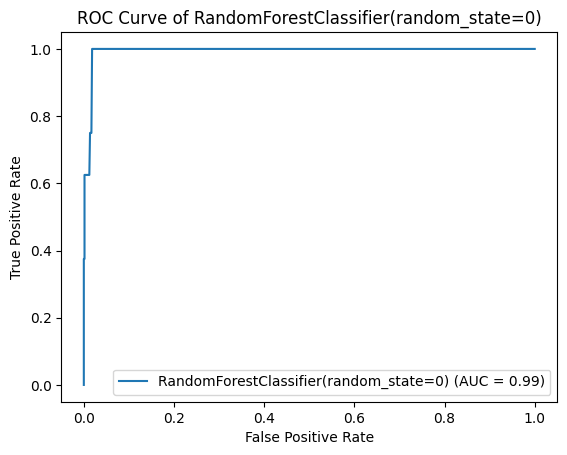

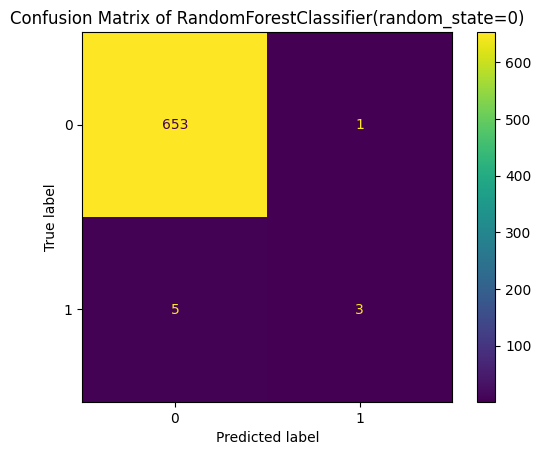

|                                        |   Accuracy_Score |   Precision_Score |   Recall_Score |   F1 Score |   ROC AUC Score |
|:---------------------------------------|-----------------:|------------------:|---------------:|-----------:|----------------:|
| RandomForestClassifier(random_state=0) |         0.990937 |              0.75 |          0.375 |        0.5 |        0.995222 |




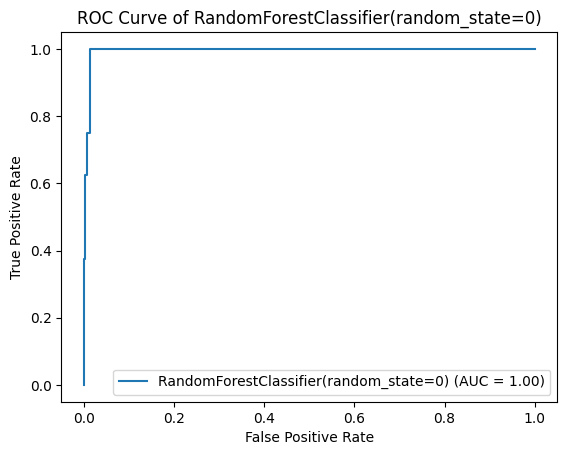

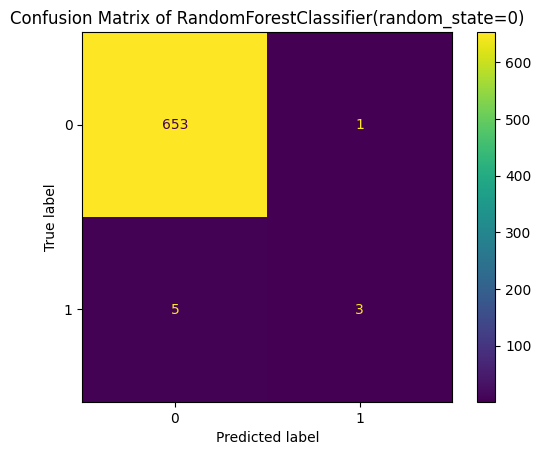

|                                        |   Accuracy_Score |   Precision_Score |   Recall_Score |   F1 Score |   ROC AUC Score |
|:---------------------------------------|-----------------:|------------------:|---------------:|-----------:|----------------:|
| RandomForestClassifier(random_state=0) |         0.990937 |              0.75 |          0.375 |        0.5 |        0.996942 |




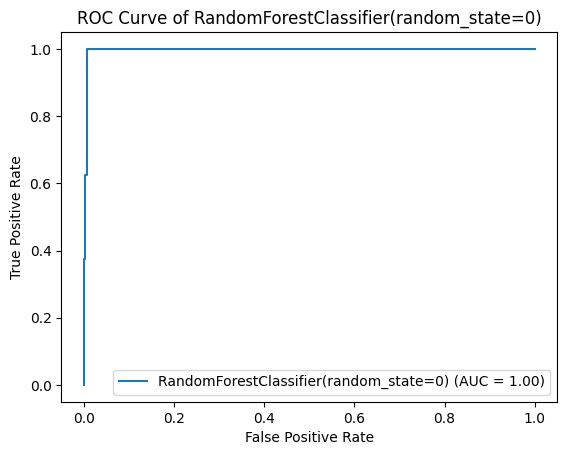

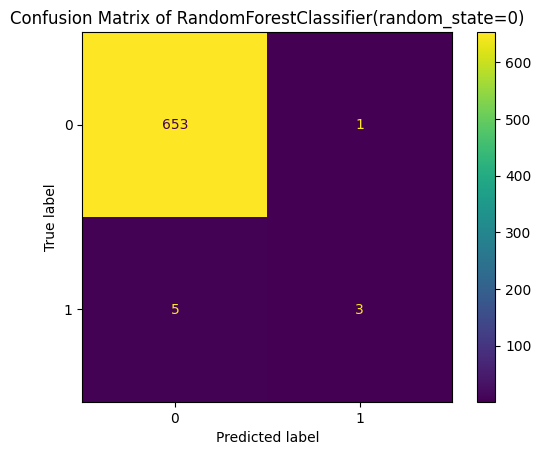

|                                        |   Accuracy_Score |   Precision_Score |   Recall_Score |   F1 Score |   ROC AUC Score |
|:---------------------------------------|-----------------:|------------------:|---------------:|-----------:|----------------:|
| RandomForestClassifier(random_state=0) |         0.993958 |                 1 |            0.5 |   0.666667 |        0.996369 |




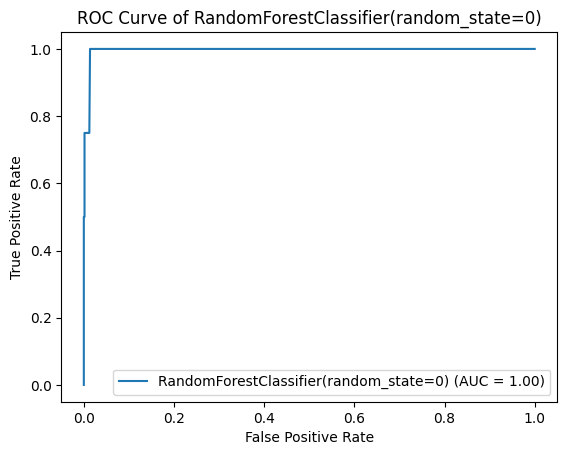

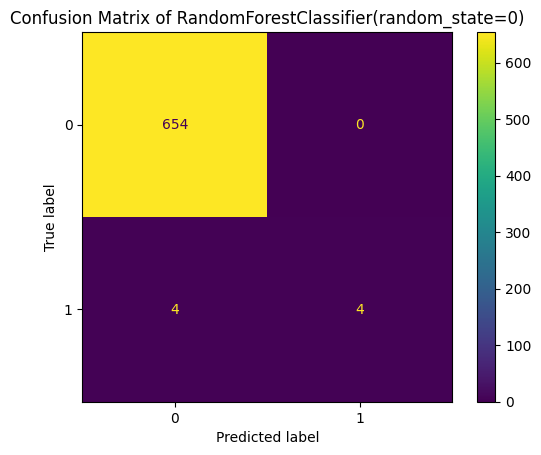

|                                        |   Accuracy_Score |   Precision_Score |   Recall_Score |   F1 Score |   ROC AUC Score |
|:---------------------------------------|-----------------:|------------------:|---------------:|-----------:|----------------:|
| RandomForestClassifier(random_state=0) |         0.990937 |              0.75 |          0.375 |        0.5 |        0.992164 |




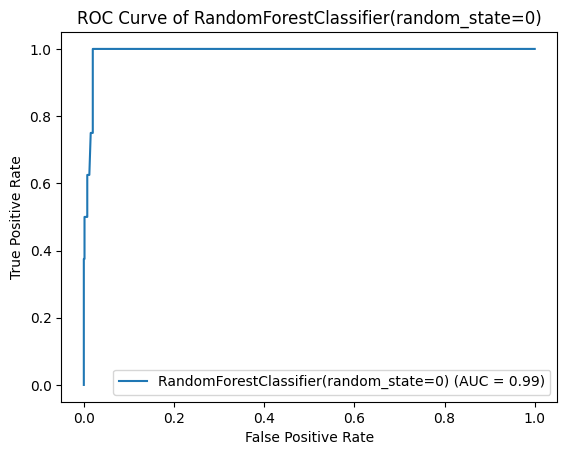

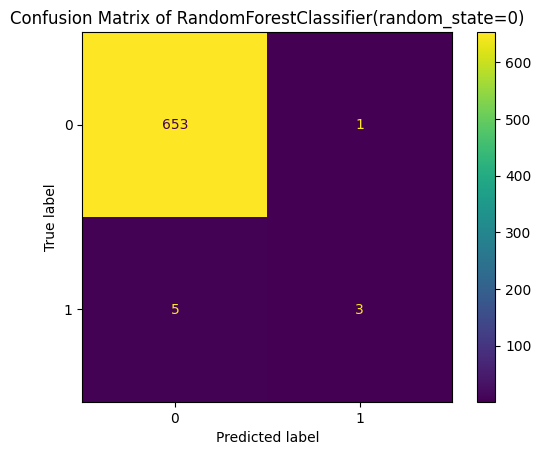

In [ ]:
model_fit(RandomForestClassifier(random_state=0), X_train_1, X_test_1, y_train_1, y_test_1)
model_fit(RandomForestClassifier(random_state=0), X_train_2, X_test_2, y_train_2, y_test_2)
model_fit(RandomForestClassifier(random_state=0), X_train_3, X_test_3, y_train_3, y_test_3)
model_fit(RandomForestClassifier(random_state=0), X_train_4, X_test_4, y_train_4, y_test_4)
model_fit(RandomForestClassifier(random_state=0), X_train_5, X_test_5, y_train_5, y_test_5)

In [ ]:
print(type(Accuracy_score_array_dt_1))
print(Accuracy_score_array_dt_1)
print(Precision_score_array)
print(Recall_score_array)
print(F1_score_array)
print(ROC_AUC_score_array)

<class 'list'>
[0.9909365558912386]
[0.75, 0.75, 0.75, 1.0, 0.75]
[0.375, 0.375, 0.375, 0.5, 0.375]
[0.5, 0.5, 0.5, 0.6666666666666666, 0.5]
[0.9935970948012233, 0.9952217125382263, 0.9969418960244648, 0.996368501529052, 0.9921636085626911]


In [ ]:
Accuracy_score_array_dt_1.append(Accuracy_score_array[0])
Accuracy_score_array_dt_2.append(Accuracy_score_array[1])
Accuracy_score_array_dt_3.append(Accuracy_score_array[2])
Accuracy_score_array_dt_4.append(Accuracy_score_array[3])
Accuracy_score_array_dt_5.append(Accuracy_score_array[4])
Accuracy_score_array=[]

Precision_score_array_dt_1.append(Precision_score_array[0])
Precision_score_array_dt_2.append(Precision_score_array[1])
Precision_score_array_dt_3.append(Precision_score_array[2])
Precision_score_array_dt_4.append(Precision_score_array[3])
Precision_score_array_dt_5.append(Precision_score_array[4])
Precision_score_array=[]

Recall_score_array_dt_1.append(Recall_score_array[0])
Recall_score_array_dt_2.append(Recall_score_array[1])
Recall_score_array_dt_3.append(Recall_score_array[2])
Recall_score_array_dt_4.append(Recall_score_array[3])
Recall_score_array_dt_5.append(Recall_score_array[4])
Recall_score_array=[]

F1_score_array_dt_1.append(F1_score_array[0])
F1_score_array_dt_2.append(F1_score_array[1])
F1_score_array_dt_3.append(F1_score_array[2])
F1_score_array_dt_4.append(F1_score_array[3])
F1_score_array_dt_5.append(F1_score_array[4])
F1_score_array=[]

ROC_AUC_score_array_dt_1.append(ROC_AUC_score_array[0])
ROC_AUC_score_array_dt_2.append(ROC_AUC_score_array[1])
ROC_AUC_score_array_dt_3.append(ROC_AUC_score_array[2])
ROC_AUC_score_array_dt_4.append(ROC_AUC_score_array[3])
ROC_AUC_score_array_dt_5.append(ROC_AUC_score_array[4])
ROC_AUC_score_array=[]

# Confusion_matrix_dt_1.append(Confusion_matrix[0])
# Confusion_matrix_dt_2.append(Confusion_matrix[1])
# Confusion_matrix_dt_3.append(Confusion_matrix[2])
# Confusion_matrix_dt_4.append(Confusion_matrix[3])
# Confusion_matrix_dt_5.append(Confusion_matrix[4])
# Confusion_matrix=[]

In [ ]:
print(Accuracy_score_array_dt_1)
print(Accuracy_score_array)
print(Precision_score_array)
print(Recall_score_array)
print(F1_score_array)
print(ROC_AUC_score_array)

[0.9909365558912386, 0.9909365558912386]
[]
[]
[]
[]
[]


# **Gaussian Naive Bayes Classifier**

|              |   Accuracy_Score |   Precision_Score |   Recall_Score |   F1 Score |   ROC AUC Score |
|:-------------|-----------------:|------------------:|---------------:|-----------:|----------------:|
| GaussianNB() |         0.945619 |          0.181818 |              1 |   0.307692 |        0.978976 |




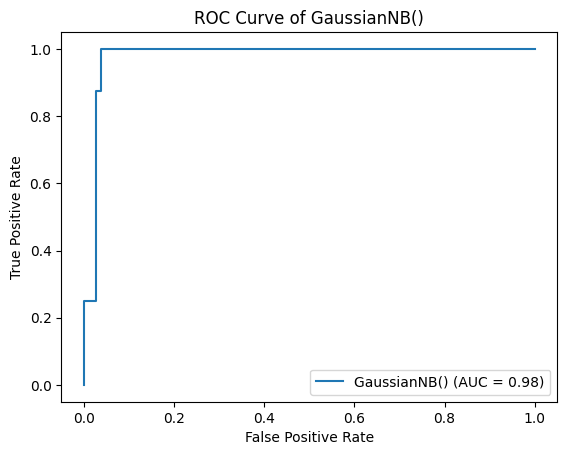

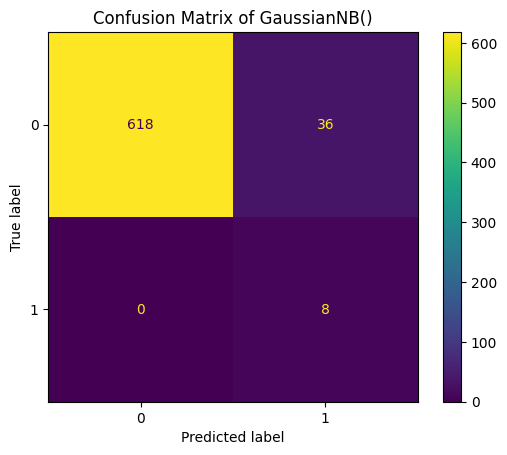

|              |   Accuracy_Score |   Precision_Score |   Recall_Score |   F1 Score |   ROC AUC Score |
|:-------------|-----------------:|------------------:|---------------:|-----------:|----------------:|
| GaussianNB() |         0.945619 |          0.181818 |              1 |   0.307692 |        0.979167 |




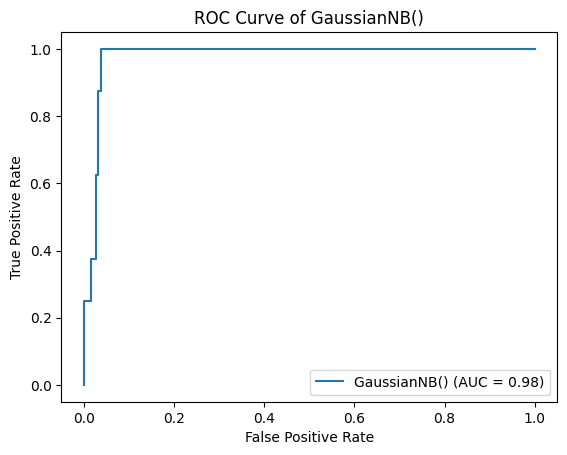

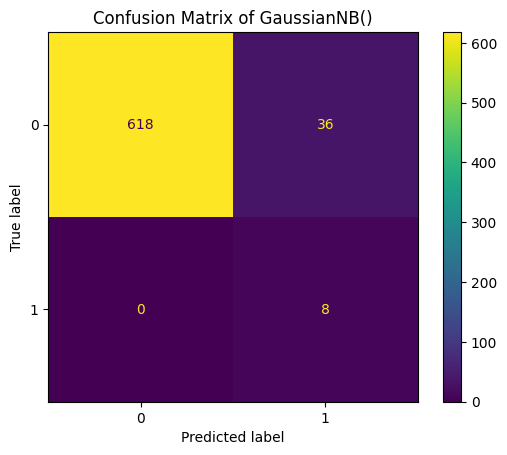

|              |   Accuracy_Score |   Precision_Score |   Recall_Score |   F1 Score |   ROC AUC Score |
|:-------------|-----------------:|------------------:|---------------:|-----------:|----------------:|
| GaussianNB() |         0.915408 |             0.125 |              1 |   0.222222 |        0.975344 |




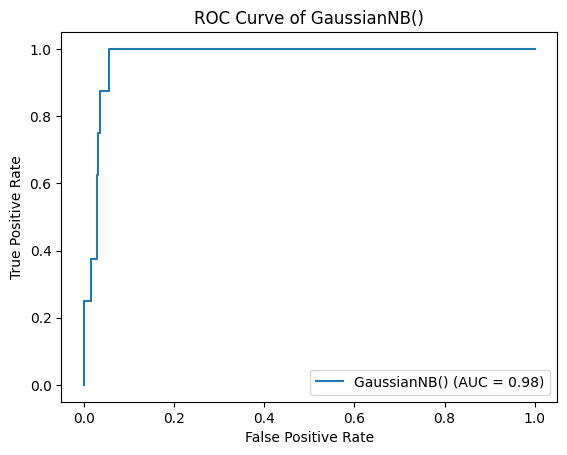

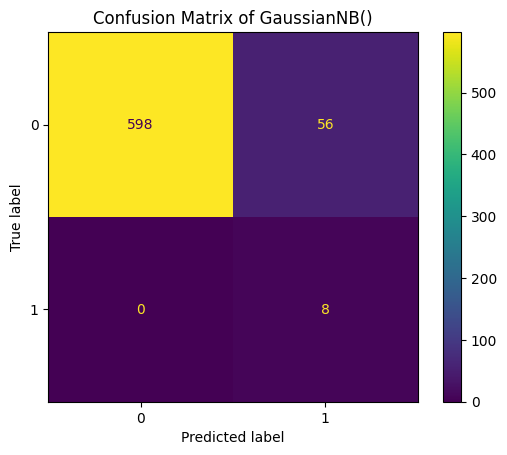

|              |   Accuracy_Score |   Precision_Score |   Recall_Score |   F1 Score |   ROC AUC Score |
|:-------------|-----------------:|------------------:|---------------:|-----------:|----------------:|
| GaussianNB() |         0.959215 |          0.228571 |              1 |   0.372093 |        0.981078 |




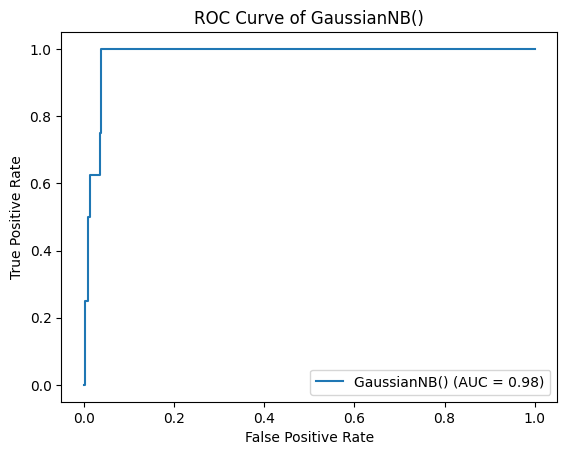

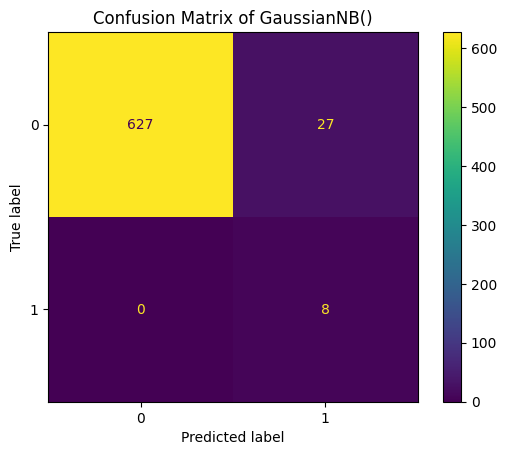

|              |   Accuracy_Score |   Precision_Score |   Recall_Score |   F1 Score |   ROC AUC Score |
|:-------------|-----------------:|------------------:|---------------:|-----------:|----------------:|
| GaussianNB() |         0.941088 |          0.121951 |          0.625 |   0.204082 |        0.935302 |




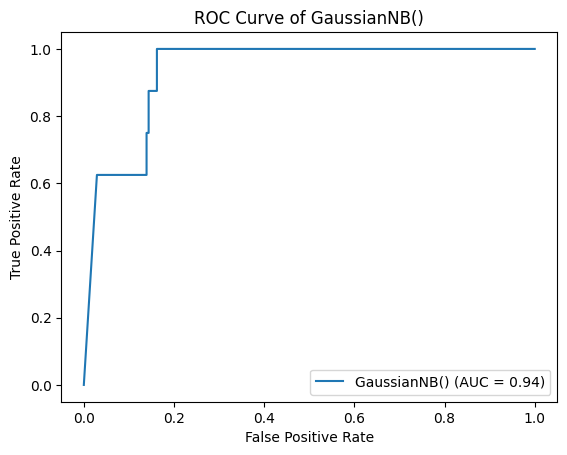

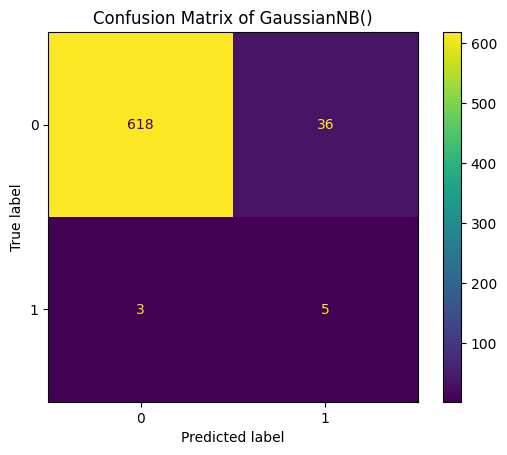

In [ ]:
Gaussian_Naive_Bayes = model_fit(GaussianNB(), X_train_1, X_test_1, y_train_1, y_test_1)
Gaussian_Naive_Bayes = model_fit(GaussianNB(), X_train_2, X_test_2, y_train_2, y_test_2)
Gaussian_Naive_Bayes = model_fit(GaussianNB(), X_train_3, X_test_3, y_train_3, y_test_3)
Gaussian_Naive_Bayes = model_fit(GaussianNB(), X_train_4, X_test_4, y_train_4, y_test_4)
Gaussian_Naive_Bayes = model_fit(GaussianNB(), X_train_5, X_test_5, y_train_5, y_test_5)


In [ ]:
print(Accuracy_score_array)
print(Precision_score_array)
print(Recall_score_array)
print(F1_score_array)
print(ROC_AUC_score_array)

[0.945619335347432, 0.945619335347432, 0.9154078549848943, 0.959214501510574, 0.9410876132930514]
[0.18181818181818182, 0.18181818181818182, 0.125, 0.22857142857142856, 0.12195121951219512]
[1.0, 1.0, 1.0, 1.0, 0.625]
[0.3076923076923077, 0.3076923076923077, 0.2222222222222222, 0.3720930232558139, 0.20408163265306123]
[0.9789755351681957, 0.9791666666666665, 0.9753440366972477, 0.9810779816513762, 0.9353019877675841]


In [ ]:
Accuracy_score_array_dt_1.append(Accuracy_score_array[0])
Accuracy_score_array_dt_2.append(Accuracy_score_array[1])
Accuracy_score_array_dt_3.append(Accuracy_score_array[2])
Accuracy_score_array_dt_4.append(Accuracy_score_array[3])
Accuracy_score_array_dt_5.append(Accuracy_score_array[4])
Accuracy_score_array=[]

Precision_score_array_dt_1.append(Precision_score_array[0])
Precision_score_array_dt_2.append(Precision_score_array[1])
Precision_score_array_dt_3.append(Precision_score_array[2])
Precision_score_array_dt_4.append(Precision_score_array[3])
Precision_score_array_dt_5.append(Precision_score_array[4])
Precision_score_array=[]

Recall_score_array_dt_1.append(Recall_score_array[0])
Recall_score_array_dt_2.append(Recall_score_array[1])
Recall_score_array_dt_3.append(Recall_score_array[2])
Recall_score_array_dt_4.append(Recall_score_array[3])
Recall_score_array_dt_5.append(Recall_score_array[4])
Recall_score_array=[]

F1_score_array_dt_1.append(F1_score_array[0])
F1_score_array_dt_2.append(F1_score_array[1])
F1_score_array_dt_3.append(F1_score_array[2])
F1_score_array_dt_4.append(F1_score_array[3])
F1_score_array_dt_5.append(F1_score_array[4])
F1_score_array=[]

ROC_AUC_score_array_dt_1.append(ROC_AUC_score_array[0])
ROC_AUC_score_array_dt_2.append(ROC_AUC_score_array[1])
ROC_AUC_score_array_dt_3.append(ROC_AUC_score_array[2])
ROC_AUC_score_array_dt_4.append(ROC_AUC_score_array[3])
ROC_AUC_score_array_dt_5.append(ROC_AUC_score_array[4])
ROC_AUC_score_array=[]

In [ ]:
print(Accuracy_score_array_dt_1)
print(Precision_score_array_dt_2)
print(Recall_score_array)
print(F1_score_array)
print(ROC_AUC_score_array)

[0.9909365558912386, 0.9909365558912386, 0.945619335347432]
[0.8333333333333334, 0.75, 0.18181818181818182]
[]
[]
[]


# **Categorical Naive Bayes Classifier**

|                 |   Accuracy_Score |   Precision_Score |   Recall_Score |   F1 Score |   ROC AUC Score |
|:----------------|-----------------:|------------------:|---------------:|-----------:|----------------:|
| CategoricalNB() |         0.992447 |          0.666667 |           0.75 |   0.705882 |        0.991972 |




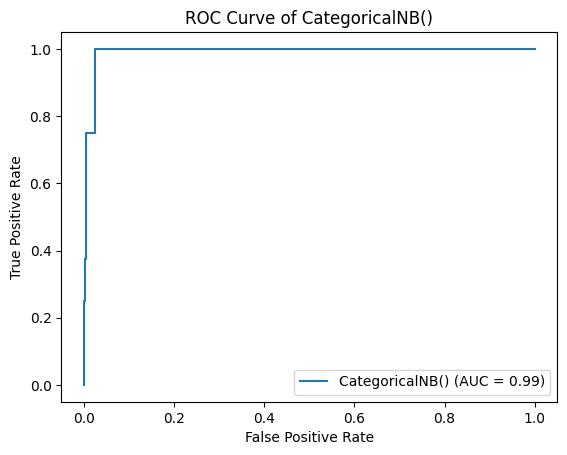

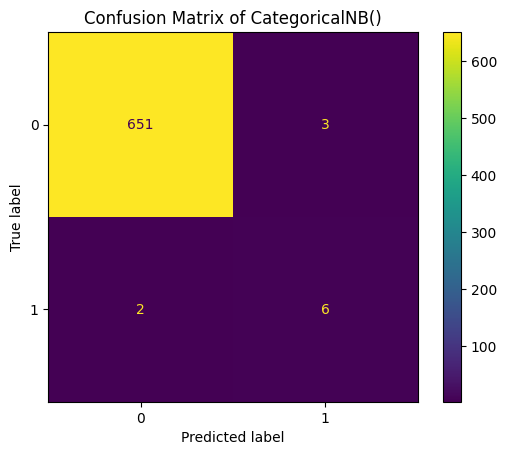

|                 |   Accuracy_Score |   Precision_Score |   Recall_Score |   F1 Score |   ROC AUC Score |
|:----------------|-----------------:|------------------:|---------------:|-----------:|----------------:|
| CategoricalNB() |         0.990937 |             0.625 |          0.625 |      0.625 |        0.991972 |




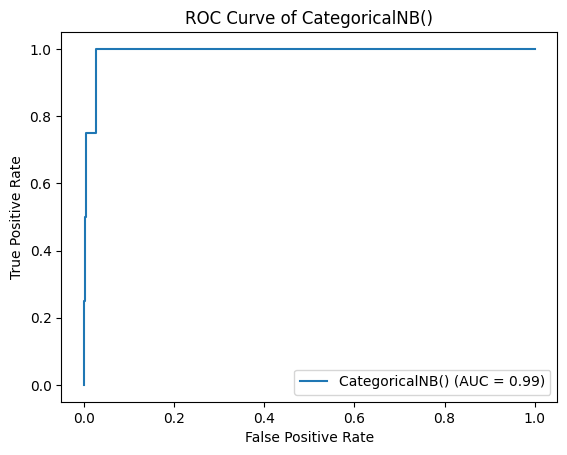

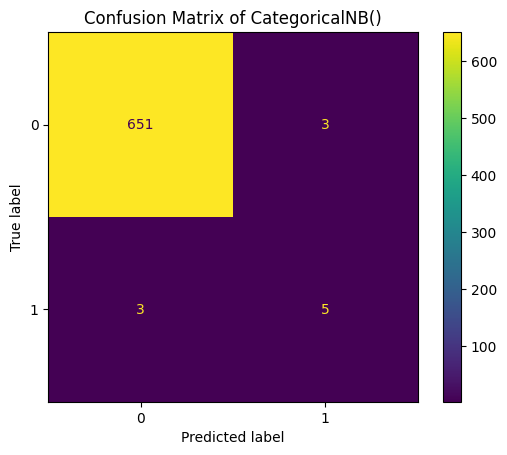

|                 |   Accuracy_Score |   Precision_Score |   Recall_Score |   F1 Score |   ROC AUC Score |
|:----------------|-----------------:|------------------:|---------------:|-----------:|----------------:|
| CategoricalNB() |         0.992447 |          0.666667 |           0.75 |   0.705882 |        0.991208 |




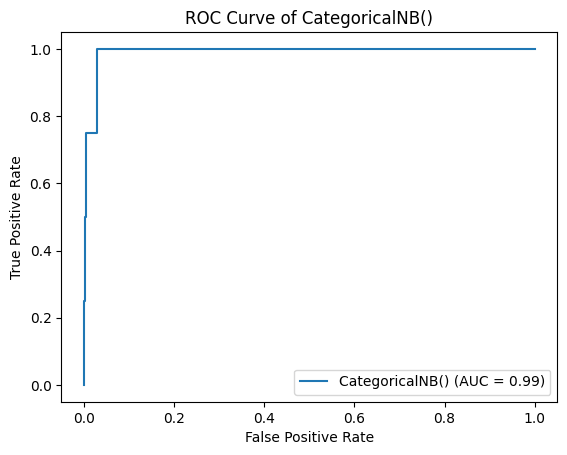

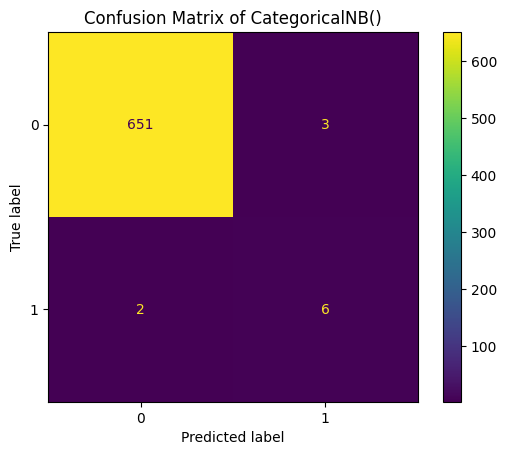

|                 |   Accuracy_Score |   Precision_Score |   Recall_Score |   F1 Score |   ROC AUC Score |
|:----------------|-----------------:|------------------:|---------------:|-----------:|----------------:|
| CategoricalNB() |         0.995468 |          0.857143 |           0.75 |        0.8 |         0.99331 |




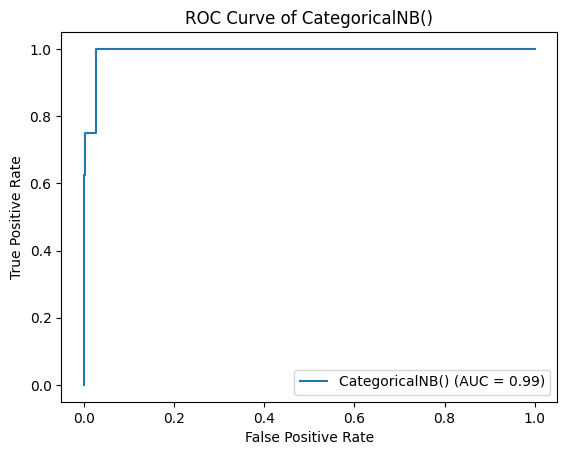

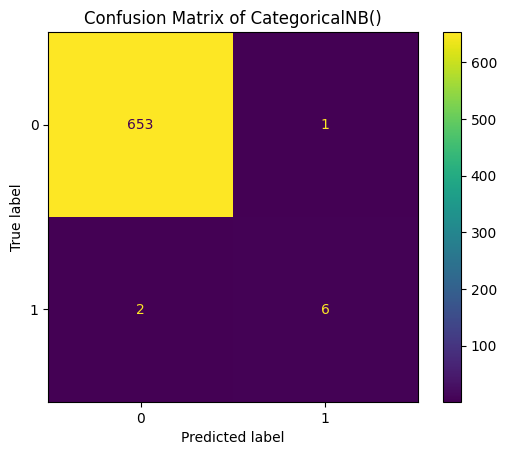

|                 |   Accuracy_Score |   Precision_Score |   Recall_Score |   F1 Score |   ROC AUC Score |
|:----------------|-----------------:|------------------:|---------------:|-----------:|----------------:|
| CategoricalNB() |         0.984894 |          0.416667 |          0.625 |        0.5 |        0.992164 |




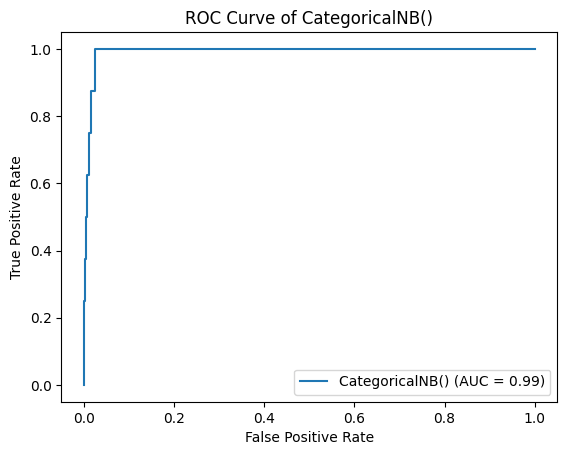

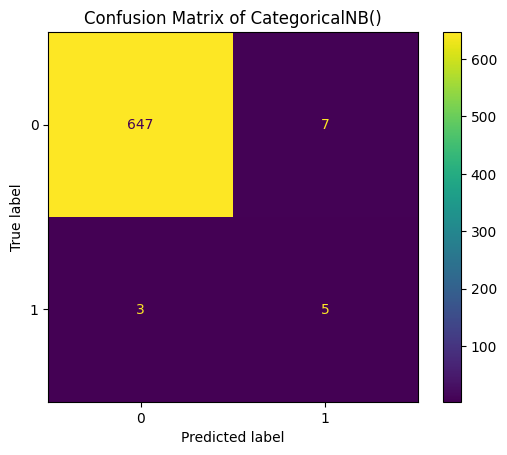

In [ ]:
Categorical_Naive_Bayes = model_fit(CategoricalNB(), X_train_1, X_test_1, y_train_1, y_test_1)
Categorical_Naive_Bayes = model_fit(CategoricalNB(), X_train_2, X_test_2, y_train_2, y_test_2)
Categorical_Naive_Bayes = model_fit(CategoricalNB(), X_train_3, X_test_3, y_train_3, y_test_3)
Categorical_Naive_Bayes = model_fit(CategoricalNB(), X_train_4, X_test_4, y_train_4, y_test_4)
Categorical_Naive_Bayes = model_fit(CategoricalNB(), X_train_5, X_test_5, y_train_5, y_test_5)

In [ ]:
Accuracy_score_array_dt_1.append(Accuracy_score_array[0])
Accuracy_score_array_dt_2.append(Accuracy_score_array[1])
Accuracy_score_array_dt_3.append(Accuracy_score_array[2])
Accuracy_score_array_dt_4.append(Accuracy_score_array[3])
Accuracy_score_array_dt_5.append(Accuracy_score_array[4])
Accuracy_score_array=[]

Precision_score_array_dt_1.append(Precision_score_array[0])
Precision_score_array_dt_2.append(Precision_score_array[1])
Precision_score_array_dt_3.append(Precision_score_array[2])
Precision_score_array_dt_4.append(Precision_score_array[3])
Precision_score_array_dt_5.append(Precision_score_array[4])
Precision_score_array=[]

Recall_score_array_dt_1.append(Recall_score_array[0])
Recall_score_array_dt_2.append(Recall_score_array[1])
Recall_score_array_dt_3.append(Recall_score_array[2])
Recall_score_array_dt_4.append(Recall_score_array[3])
Recall_score_array_dt_5.append(Recall_score_array[4])
Recall_score_array=[]

F1_score_array_dt_1.append(F1_score_array[0])
F1_score_array_dt_2.append(F1_score_array[1])
F1_score_array_dt_3.append(F1_score_array[2])
F1_score_array_dt_4.append(F1_score_array[3])
F1_score_array_dt_5.append(F1_score_array[4])
F1_score_array=[]

ROC_AUC_score_array_dt_1.append(ROC_AUC_score_array[0])
ROC_AUC_score_array_dt_2.append(ROC_AUC_score_array[1])
ROC_AUC_score_array_dt_3.append(ROC_AUC_score_array[2])
ROC_AUC_score_array_dt_4.append(ROC_AUC_score_array[3])
ROC_AUC_score_array_dt_5.append(ROC_AUC_score_array[4])
ROC_AUC_score_array=[]

In [ ]:
print(Accuracy_score_array_dt_1)
print(Precision_score_array_dt_2)
print(Recall_score_array)
print(F1_score_array)
print(ROC_AUC_score_array)

[0.9909365558912386, 0.9909365558912386, 0.945619335347432, 0.9924471299093656]
[0.8333333333333334, 0.75, 0.18181818181818182, 0.625]
[]
[]
[]


# **Bernoulli Naive Bayes Classifier**

|               |   Accuracy_Score |   Precision_Score |   Recall_Score |   F1 Score |   ROC AUC Score |
|:--------------|-----------------:|------------------:|---------------:|-----------:|----------------:|
| BernoulliNB() |         0.986405 |               0.4 |           0.25 |   0.307692 |        0.915807 |




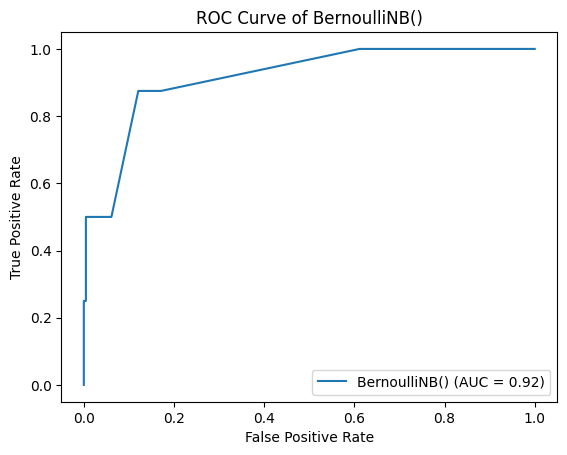

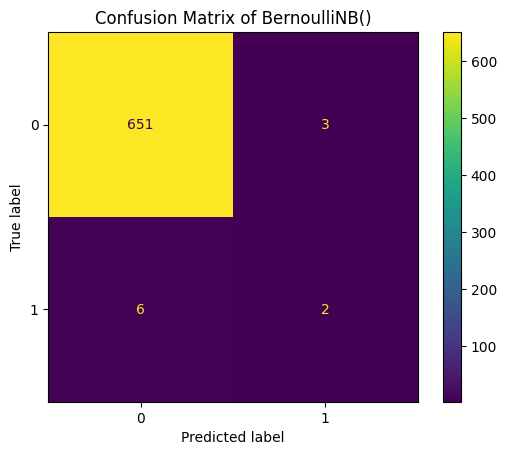

|               |   Accuracy_Score |   Precision_Score |   Recall_Score |   F1 Score |   ROC AUC Score |
|:--------------|-----------------:|------------------:|---------------:|-----------:|----------------:|
| BernoulliNB() |         0.980363 |          0.307692 |            0.5 |   0.380952 |        0.878631 |




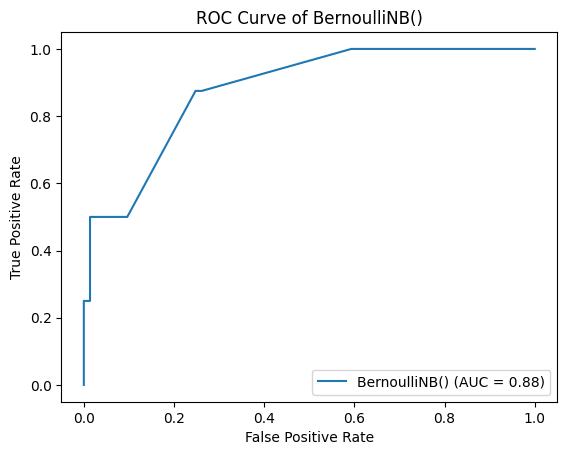

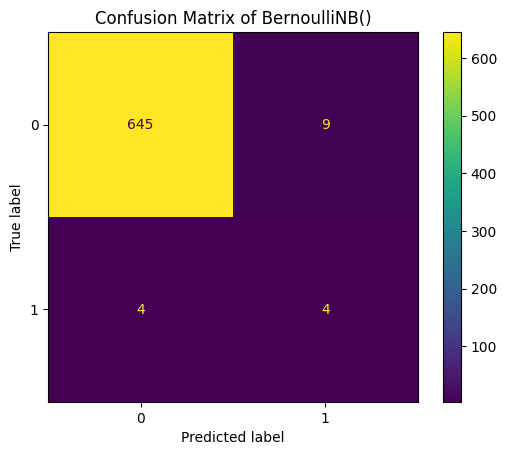

|               |   Accuracy_Score |   Precision_Score |   Recall_Score |   F1 Score |   ROC AUC Score |
|:--------------|-----------------:|------------------:|---------------:|-----------:|----------------:|
| BernoulliNB() |         0.987915 |                 0 |              0 |          0 |         0.88427 |




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


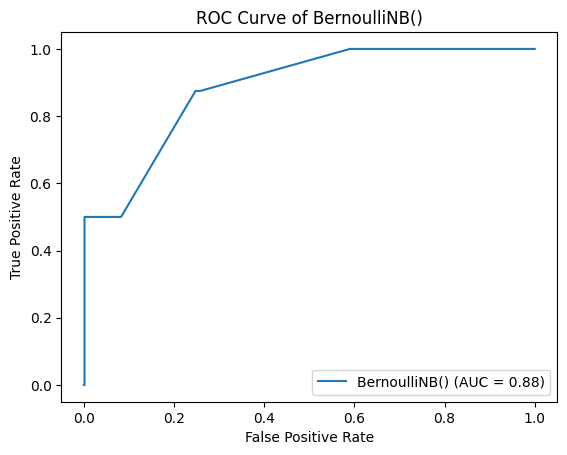

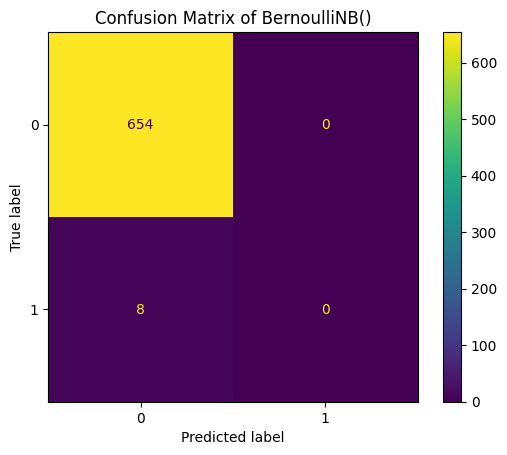

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


|               |   Accuracy_Score |   Precision_Score |   Recall_Score |   F1 Score |   ROC AUC Score |
|:--------------|-----------------:|------------------:|---------------:|-----------:|----------------:|
| BernoulliNB() |         0.987915 |                 0 |              0 |          0 |        0.854931 |




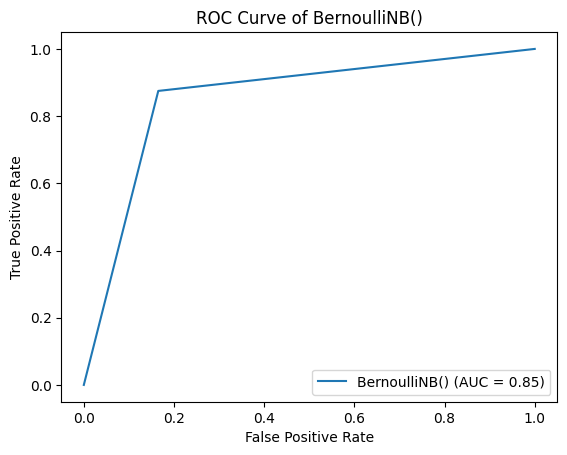

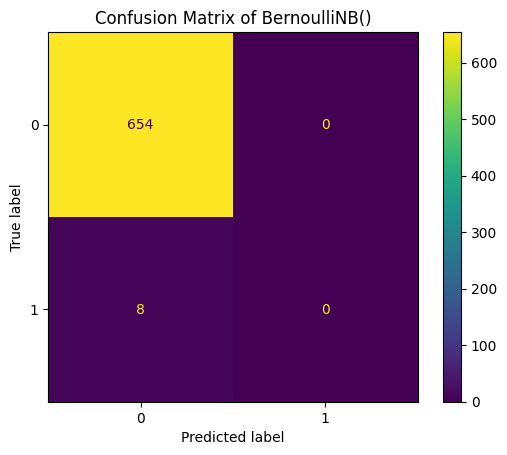

|               |   Accuracy_Score |   Precision_Score |   Recall_Score |   F1 Score |   ROC AUC Score |
|:--------------|-----------------:|------------------:|---------------:|-----------:|----------------:|
| BernoulliNB() |         0.989426 |          0.571429 |            0.5 |   0.533333 |        0.939889 |




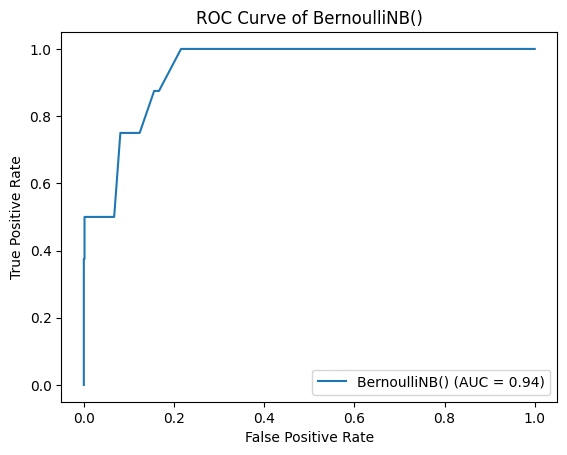

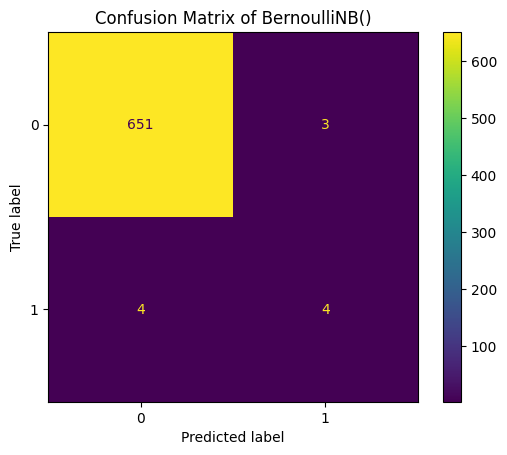

In [ ]:
Bernoulli_Naive_Bayes = model_fit(BernoulliNB(), X_train_1, X_test_1, y_train_1, y_test_1)
Bernoulli_Naive_Bayes = model_fit(BernoulliNB(), X_train_2, X_test_2, y_train_2, y_test_2)
Bernoulli_Naive_Bayes = model_fit(BernoulliNB(), X_train_3, X_test_3, y_train_3, y_test_3)
Bernoulli_Naive_Bayes = model_fit(BernoulliNB(), X_train_4, X_test_4, y_train_4, y_test_4)
Bernoulli_Naive_Bayes = model_fit(BernoulliNB(), X_train_5, X_test_5, y_train_5, y_test_5)

In [ ]:
Accuracy_score_array_dt_1.append(Accuracy_score_array[0])
Accuracy_score_array_dt_2.append(Accuracy_score_array[1])
Accuracy_score_array_dt_3.append(Accuracy_score_array[2])
Accuracy_score_array_dt_4.append(Accuracy_score_array[3])
Accuracy_score_array_dt_5.append(Accuracy_score_array[4])
Accuracy_score_array=[]

Precision_score_array_dt_1.append(Precision_score_array[0])
Precision_score_array_dt_2.append(Precision_score_array[1])
Precision_score_array_dt_3.append(Precision_score_array[2])
Precision_score_array_dt_4.append(Precision_score_array[3])
Precision_score_array_dt_5.append(Precision_score_array[4])
Precision_score_array=[]

Recall_score_array_dt_1.append(Recall_score_array[0])
Recall_score_array_dt_2.append(Recall_score_array[1])
Recall_score_array_dt_3.append(Recall_score_array[2])
Recall_score_array_dt_4.append(Recall_score_array[3])
Recall_score_array_dt_5.append(Recall_score_array[4])
Recall_score_array=[]

F1_score_array_dt_1.append(F1_score_array[0])
F1_score_array_dt_2.append(F1_score_array[1])
F1_score_array_dt_3.append(F1_score_array[2])
F1_score_array_dt_4.append(F1_score_array[3])
F1_score_array_dt_5.append(F1_score_array[4])
F1_score_array=[]

ROC_AUC_score_array_dt_1.append(ROC_AUC_score_array[0])
ROC_AUC_score_array_dt_2.append(ROC_AUC_score_array[1])
ROC_AUC_score_array_dt_3.append(ROC_AUC_score_array[2])
ROC_AUC_score_array_dt_4.append(ROC_AUC_score_array[3])
ROC_AUC_score_array_dt_5.append(ROC_AUC_score_array[4])
ROC_AUC_score_array=[]

In [ ]:
print(Accuracy_score_array_dt_1)
print(Precision_score_array_dt_2)
print(Recall_score_array)
print(F1_score_array)
print(ROC_AUC_score_array)

[0.9909365558912386, 0.9909365558912386, 0.945619335347432, 0.9924471299093656, 0.986404833836858]
[0.8333333333333334, 0.75, 0.18181818181818182, 0.625, 0.3076923076923077]
[]
[]
[]


# **KNearest Neighbor Classifier**

In [ ]:
#We will find out which K value will work best with different distance matrixes
k_range = range(3, 16)
metrics = ["euclidean", "manhattan", "chebyshev", "minkowski", "mahalanobis"]

# knns = []
# for k in k_range:
#     knns.append(model_fit(KNeighborsClassifier(n_neighbors=k)))

param_grid = dict(n_neighbors = list(k_range), metric=metrics)
# param_grid

# Instantiate the algorithm
knn = KNeighborsClassifier()

# Instantiate the grid
grid = GridSearchCV(knn, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_1, y_train_1)
print("Best parameter:", grid.best_params_)
print("Best score:", grid.best_score_)

# plt.plot(k_range, [accuracy for accuracy in knns])
# plt.xlabel('Count of Neighbors')
# plt.ylabel('Test Accuracy of Neighbors')
# plt.title('KNN Test Accuracy')
# plt.show()
# print(knns)
# print("Neighbor: "+str(k_range[np.argmax([accuracy for accuracy in knns])])+" with max accuracy: "+str(np.max([accuracy for accuracy in knns])))

Best parameter: {'metric': 'euclidean', 'n_neighbors': 4}
Best score: 0.9943310463121785


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.99395226 0.99433105 0.99395369 0.99282161 0.99282161 0.99206404
 0.99206404 0.99206404 0.99130789 0.98979417 0.98903802 0.98979703
 0.98941967 0.99395226 0.99395226 0.9935749  0.99282161 0.99282161
 0.99206404 0.99206404 0.99206404 0.99168668 0.98979417 0.98903802
 0.98979703 0.98941967 0.99395226 0.99433105 0.99395369 0.99282161
 0.99282161 0.99206404 0.99206404 0.99206404 0.99206404 0.98979417
 0.98941538 0.98979703 0.98941967 0.99395226 0.99433105 0.99395369
 0.99282161 0.99282161 0.99206404 0.99206404 0.99206404 0.99130789
 0.98979417 0.98903802 0.98979703 0.98941967        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan]
  warnings.warn(


## **Optimal KNN model**

|                                                         |   Accuracy_Score |   Precision_Score |   Recall_Score |   F1 Score |   ROC AUC Score |
|:--------------------------------------------------------|-----------------:|------------------:|---------------:|-----------:|----------------:|
| KNeighborsClassifier(metric='manhattan', n_neighbors=3) |         0.990937 |              0.75 |          0.375 |        0.5 |        0.686067 |




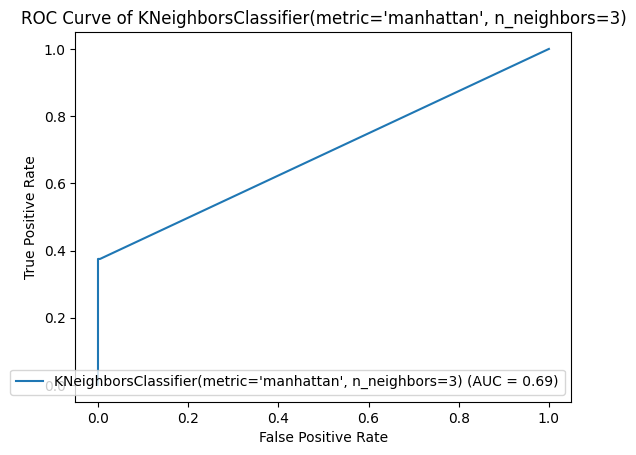

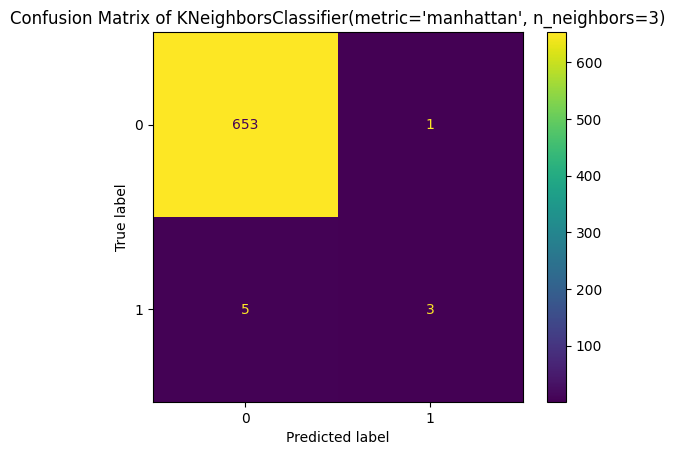

|                                                         |   Accuracy_Score |   Precision_Score |   Recall_Score |   F1 Score |   ROC AUC Score |
|:--------------------------------------------------------|-----------------:|------------------:|---------------:|-----------:|----------------:|
| KNeighborsClassifier(metric='manhattan', n_neighbors=3) |         0.990937 |              0.75 |          0.375 |        0.5 |        0.686067 |




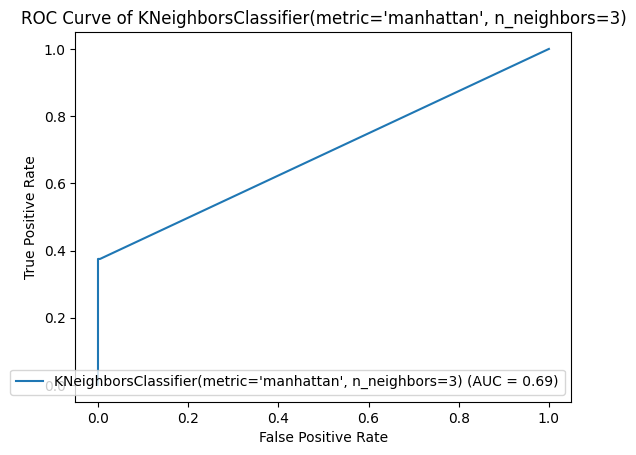

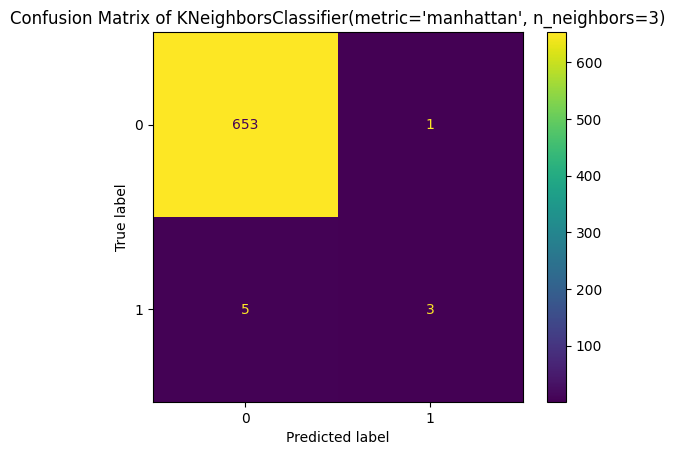

|                                                         |   Accuracy_Score |   Precision_Score |   Recall_Score |   F1 Score |   ROC AUC Score |
|:--------------------------------------------------------|-----------------:|------------------:|---------------:|-----------:|----------------:|
| KNeighborsClassifier(metric='manhattan', n_neighbors=3) |         0.990937 |              0.75 |          0.375 |        0.5 |        0.686067 |




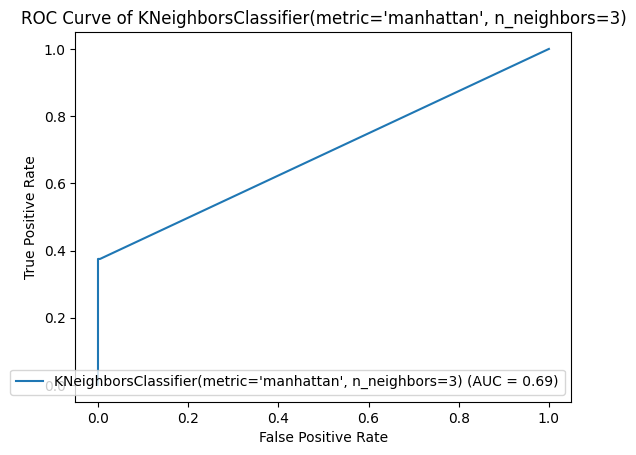

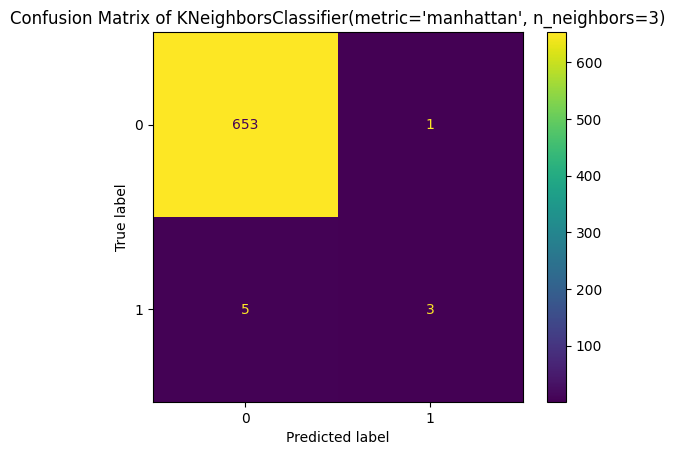

|                                                         |   Accuracy_Score |   Precision_Score |   Recall_Score |   F1 Score |   ROC AUC Score |
|:--------------------------------------------------------|-----------------:|------------------:|---------------:|-----------:|----------------:|
| KNeighborsClassifier(metric='manhattan', n_neighbors=3) |         0.990937 |              0.75 |          0.375 |        0.5 |        0.685111 |




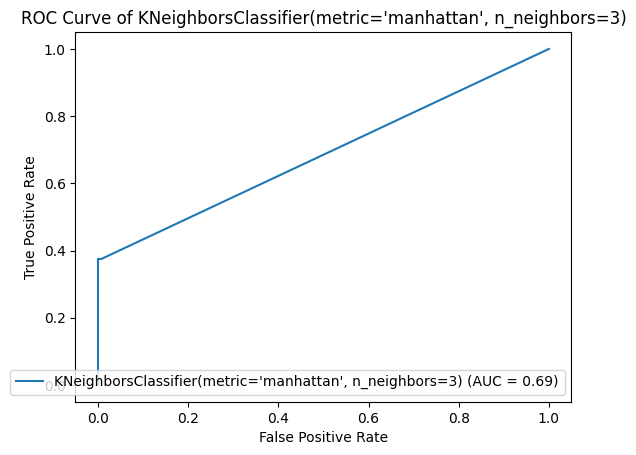

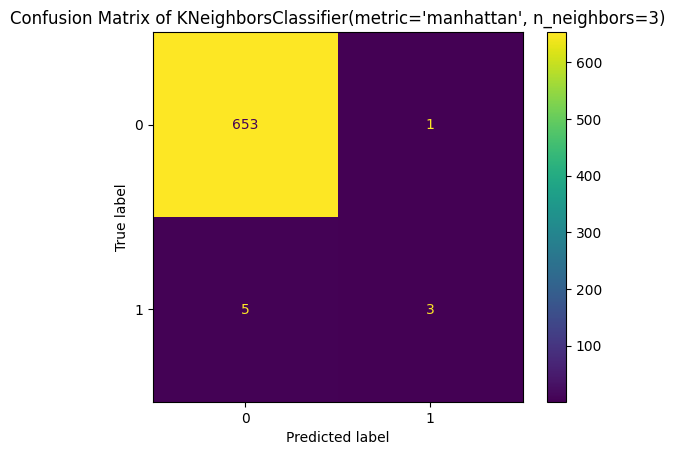

|                                                         |   Accuracy_Score |   Precision_Score |   Recall_Score |   F1 Score |   ROC AUC Score |
|:--------------------------------------------------------|-----------------:|------------------:|---------------:|-----------:|----------------:|
| KNeighborsClassifier(metric='manhattan', n_neighbors=3) |         0.992447 |               0.8 |            0.5 |   0.615385 |         0.87242 |




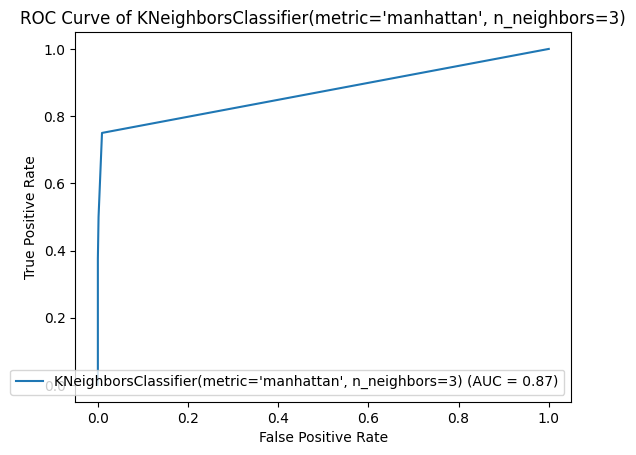

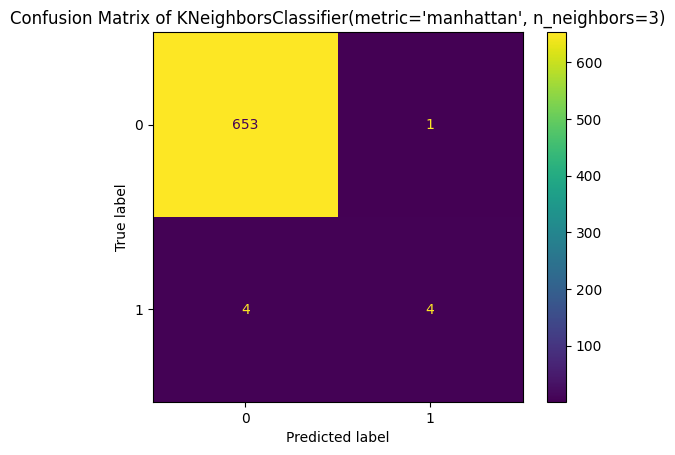

In [ ]:
#optimal KNN
optimal_knn = KNeighborsClassifier(metric='manhattan',n_neighbors = 3)
model_fit(optimal_knn, X_train_1, X_test_1, y_train_1, y_test_1)
model_fit(optimal_knn, X_train_2, X_test_2, y_train_2, y_test_2)
model_fit(optimal_knn, X_train_3, X_test_3, y_train_3, y_test_3)
model_fit(optimal_knn, X_train_4, X_test_4, y_train_4, y_test_4)
model_fit(optimal_knn, X_train_5, X_test_5, y_train_5, y_test_5)

In [ ]:
Accuracy_score_array_dt_1.append(Accuracy_score_array[0])
Accuracy_score_array_dt_2.append(Accuracy_score_array[1])
Accuracy_score_array_dt_3.append(Accuracy_score_array[2])
Accuracy_score_array_dt_4.append(Accuracy_score_array[3])
Accuracy_score_array_dt_5.append(Accuracy_score_array[4])
Accuracy_score_array=[]

Precision_score_array_dt_1.append(Precision_score_array[0])
Precision_score_array_dt_2.append(Precision_score_array[1])
Precision_score_array_dt_3.append(Precision_score_array[2])
Precision_score_array_dt_4.append(Precision_score_array[3])
Precision_score_array_dt_5.append(Precision_score_array[4])
Precision_score_array=[]

Recall_score_array_dt_1.append(Recall_score_array[0])
Recall_score_array_dt_2.append(Recall_score_array[1])
Recall_score_array_dt_3.append(Recall_score_array[2])
Recall_score_array_dt_4.append(Recall_score_array[3])
Recall_score_array_dt_5.append(Recall_score_array[4])
Recall_score_array=[]

F1_score_array_dt_1.append(F1_score_array[0])
F1_score_array_dt_2.append(F1_score_array[1])
F1_score_array_dt_3.append(F1_score_array[2])
F1_score_array_dt_4.append(F1_score_array[3])
F1_score_array_dt_5.append(F1_score_array[4])
F1_score_array=[]

ROC_AUC_score_array_dt_1.append(ROC_AUC_score_array[0])
ROC_AUC_score_array_dt_2.append(ROC_AUC_score_array[1])
ROC_AUC_score_array_dt_3.append(ROC_AUC_score_array[2])
ROC_AUC_score_array_dt_4.append(ROC_AUC_score_array[3])
ROC_AUC_score_array_dt_5.append(ROC_AUC_score_array[4])
ROC_AUC_score_array=[]

In [ ]:
print(Accuracy_score_array_dt_1)
print(Precision_score_array_dt_2)
print(Recall_score_array)
print(F1_score_array)
print(ROC_AUC_score_array)

[0.9909365558912386, 0.9909365558912386, 0.945619335347432, 0.9924471299093656, 0.986404833836858, 0.9909365558912386]
[0.8333333333333334, 0.75, 0.18181818181818182, 0.625, 0.3076923076923077, 0.75]
[]
[]
[]


# **Neural Network formation**

In [ ]:
model_S = Sequential()
model_S.add(Dense(64, input_dim=X_train_5.shape[1], activation='relu'))
model_S.add(Dense(32, activation='relu'))
model_S.add(Dense(1, activation='sigmoid'))

# Compile the model
model_S.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_S.fit(X_train_5, y_train_5, epochs=10, batch_size=32, validation_data=(X_test_5, y_test_5))

# Evaluate the model
y_pred = model_S.predict(X_test_5)
y_pred = np.round(y_pred)
accuracy = accuracy_score(y_test_5, y_pred)
print('Accuracy: %.2f%%' % (accuracy * 100))

Epoch 1/10
83/83 [==============================] - 1s 5ms/step - loss: 75.6166 - accuracy: 0.8969 - val_loss: 10.3601 - val_accuracy: 0.9879
Epoch 2/10
83/83 [==============================] - 0s 3ms/step - loss: 5.4796 - accuracy: 0.9834 - val_loss: 2.6859 - val_accuracy: 0.9789
Epoch 3/10
83/83 [==============================] - 0s 3ms/step - loss: 1.9808 - accuracy: 0.9717 - val_loss: 1.7035 - val_accuracy: 0.9819
Epoch 4/10
83/83 [==============================] - 0s 2ms/step - loss: 1.5180 - accuracy: 0.9758 - val_loss: 0.8776 - val_accuracy: 0.9592
Epoch 5/10
83/83 [==============================] - 0s 3ms/step - loss: 0.8826 - accuracy: 0.9796 - val_loss: 1.0628 - val_accuracy: 0.9819
Epoch 6/10
83/83 [==============================] - 0s 3ms/step - loss: 1.8488 - accuracy: 0.9781 - val_loss: 0.8118 - val_accuracy: 0.9653
Epoch 7/10
83/83 [==============================] - 0s 3ms/step - loss: 1.1465 - accuracy: 0.9807 - val_loss: 0.8392 - val_accuracy: 0.9819
Epoch 8/10
83/83 [

# **Graph plot on Mutual Information features data**:

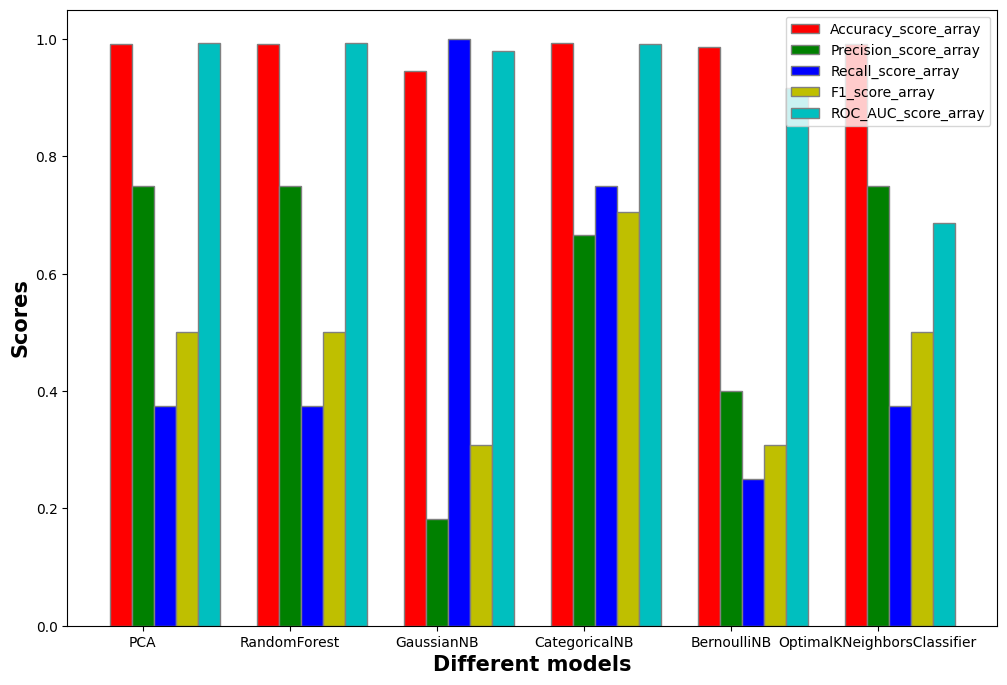

In [ ]:
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(12, 8))
  
# Set position of bar on X axis
br1 = np.arange(len(Accuracy_score_array_dt_1))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

# Make the plotprint
plt.bar(br1, Accuracy_score_array_dt_1, color ='r', width = barWidth,
        edgecolor ='grey', label ='Accuracy_score_array')
plt.bar(br2, Precision_score_array_dt_1, color ='g', width = barWidth,
        edgecolor ='grey', label ='Precision_score_array')
plt.bar(br3, Recall_score_array_dt_1, color ='b', width = barWidth,
        edgecolor ='grey', label ='Recall_score_array')
plt.bar(br4, F1_score_array_dt_1, color ='y', width = barWidth,
        edgecolor ='grey', label ='F1_score_array')
plt.bar(br5, ROC_AUC_score_array_dt_1, color ='c', width = barWidth,
        edgecolor ='grey', label ='ROC_AUC_score_array')
 
# Adding Xticks
plt.xlabel('Different models', fontweight ='bold', fontsize = 15)
plt.ylabel('Scores', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Accuracy_score_array_dt_1))],
        ['PCA', 'RandomForest', 'GaussianNB', 'CategoricalNB', 'BernoulliNB', 'OptimalKNeighborsClassifier'])
 
plt.legend()
plt.show()

# **Graph plot on Random forest features data**:

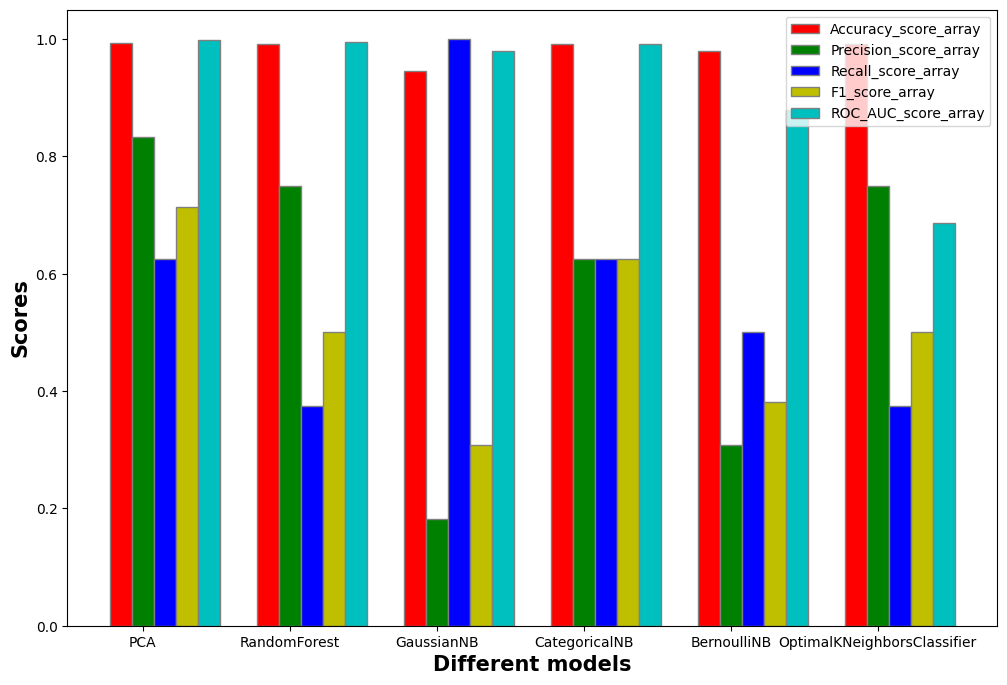

In [ ]:
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(12, 8))
  
# Set position of bar on X axis
br1 = np.arange(len(Accuracy_score_array_dt_2))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

# Make the plotprint
plt.bar(br1, Accuracy_score_array_dt_2, color ='r', width = barWidth,
        edgecolor ='grey', label ='Accuracy_score_array')
plt.bar(br2, Precision_score_array_dt_2, color ='g', width = barWidth,
        edgecolor ='grey', label ='Precision_score_array')
plt.bar(br3, Recall_score_array_dt_2, color ='b', width = barWidth,
        edgecolor ='grey', label ='Recall_score_array')
plt.bar(br4, F1_score_array_dt_2, color ='y', width = barWidth,
        edgecolor ='grey', label ='F1_score_array')
plt.bar(br5, ROC_AUC_score_array_dt_2, color ='c', width = barWidth,
        edgecolor ='grey', label ='ROC_AUC_score_array')
 
# Adding Xticks
plt.xlabel('Different models', fontweight ='bold', fontsize = 15)
plt.ylabel('Scores', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Accuracy_score_array_dt_2))],
        ['PCA', 'RandomForest', 'GaussianNB', 'CategoricalNB', 'BernoulliNB', 'OptimalKNeighborsClassifier'])
 
plt.legend()
plt.show()

# **Graph plot on XGBoost features data**

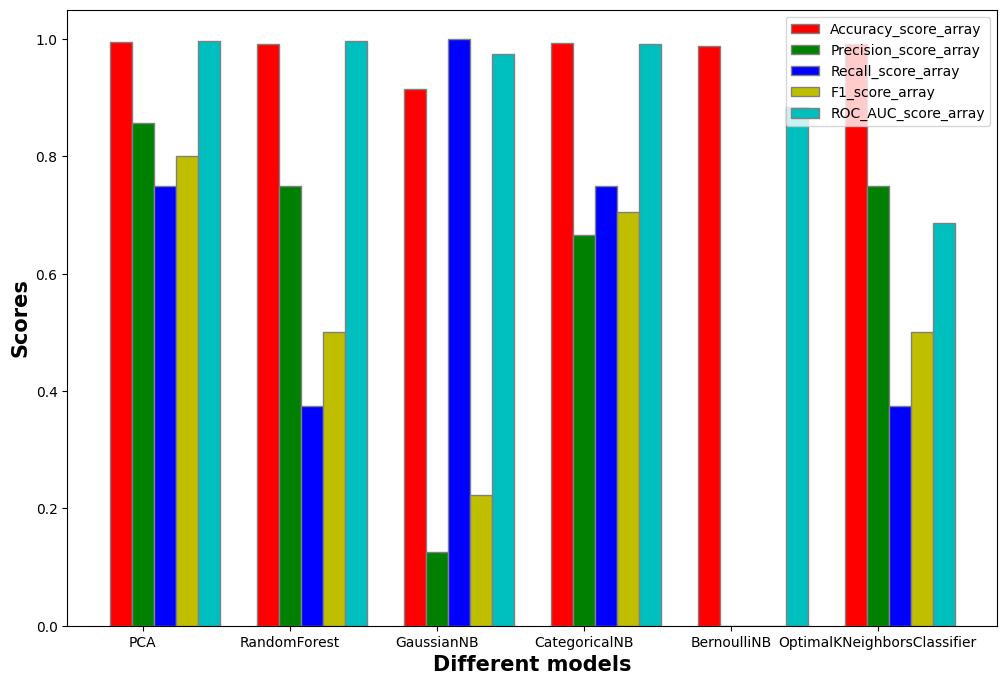

In [ ]:
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(12, 8))
  
# Set position of bar on X axis
br1 = np.arange(len(Accuracy_score_array_dt_3))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

# Make the plotprint
plt.bar(br1, Accuracy_score_array_dt_3, color ='r', width = barWidth,
        edgecolor ='grey', label ='Accuracy_score_array')
plt.bar(br2, Precision_score_array_dt_3, color ='g', width = barWidth,
        edgecolor ='grey', label ='Precision_score_array')
plt.bar(br3, Recall_score_array_dt_3, color ='b', width = barWidth,
        edgecolor ='grey', label ='Recall_score_array')
plt.bar(br4, F1_score_array_dt_3, color ='y', width = barWidth,
        edgecolor ='grey', label ='F1_score_array')
plt.bar(br5, ROC_AUC_score_array_dt_3, color ='c', width = barWidth,
        edgecolor ='grey', label ='ROC_AUC_score_array')
 
# Adding Xticks
plt.xlabel('Different models', fontweight ='bold', fontsize = 15)
plt.ylabel('Scores', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Accuracy_score_array_dt_3))],
        ['PCA', 'RandomForest', 'GaussianNB', 'CategoricalNB', 'BernoulliNB', 'OptimalKNeighborsClassifier'])
 
plt.legend()
plt.show()

# **Graph plot on Permutation importance features data**:

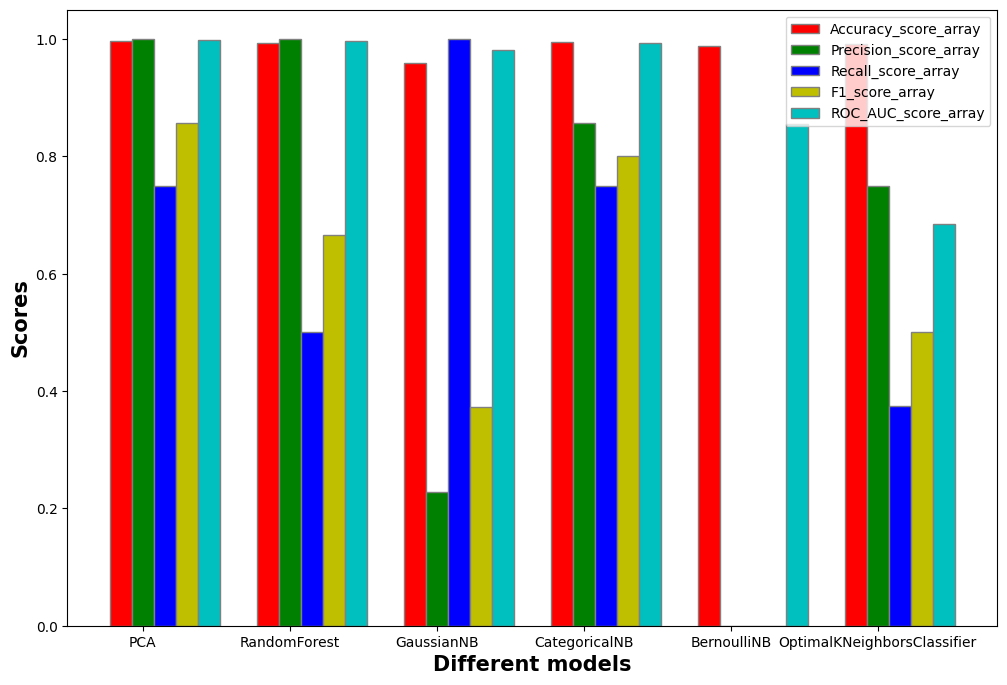

In [ ]:
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(12, 8))
  
# Set position of bar on X axis
br1 = np.arange(len(Accuracy_score_array_dt_4))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

# Make the plotprint
plt.bar(br1, Accuracy_score_array_dt_4, color ='r', width = barWidth,
        edgecolor ='grey', label ='Accuracy_score_array')
plt.bar(br2, Precision_score_array_dt_4, color ='g', width = barWidth,
        edgecolor ='grey', label ='Precision_score_array')
plt.bar(br3, Recall_score_array_dt_4, color ='b', width = barWidth,
        edgecolor ='grey', label ='Recall_score_array')
plt.bar(br4, F1_score_array_dt_4, color ='y', width = barWidth,
        edgecolor ='grey', label ='F1_score_array')
plt.bar(br5, ROC_AUC_score_array_dt_4, color ='c', width = barWidth,
        edgecolor ='grey', label ='ROC_AUC_score_array')
 
# Adding Xticks
plt.xlabel('Different models', fontweight ='bold', fontsize = 15)
plt.ylabel('Scores', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Accuracy_score_array_dt_4))],
        ['PCA', 'RandomForest', 'GaussianNB', 'CategoricalNB', 'BernoulliNB', 'OptimalKNeighborsClassifier'])
 
plt.legend()
plt.show()

# **Graph plot on Combined Importance features data**:

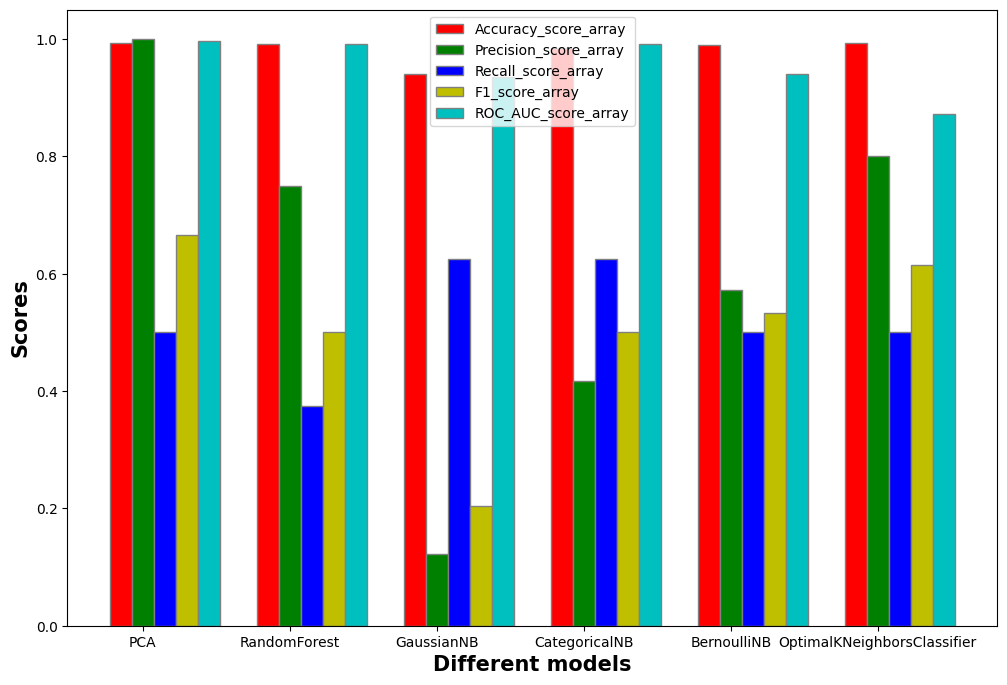

In [ ]:
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(12, 8))
  
# Set position of bar on X axis
br1 = np.arange(len(Accuracy_score_array_dt_5))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

# Make the plotprint
plt.bar(br1, Accuracy_score_array_dt_5, color ='r', width = barWidth,
        edgecolor ='grey', label ='Accuracy_score_array')
plt.bar(br2, Precision_score_array_dt_5, color ='g', width = barWidth,
        edgecolor ='grey', label ='Precision_score_array')
plt.bar(br3, Recall_score_array_dt_5, color ='b', width = barWidth,
        edgecolor ='grey', label ='Recall_score_array')
plt.bar(br4, F1_score_array_dt_5, color ='y', width = barWidth,
        edgecolor ='grey', label ='F1_score_array')
plt.bar(br5, ROC_AUC_score_array_dt_5, color ='c', width = barWidth,
        edgecolor ='grey', label ='ROC_AUC_score_array')
 
# Adding Xticks
plt.xlabel('Different models', fontweight ='bold', fontsize = 15)
plt.ylabel('Scores', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Accuracy_score_array_dt_5))],
        ['PCA', 'RandomForest', 'GaussianNB', 'CategoricalNB', 'BernoulliNB', 'OptimalKNeighborsClassifier'])
 
plt.legend()
plt.show()

# **Parzen Windows**

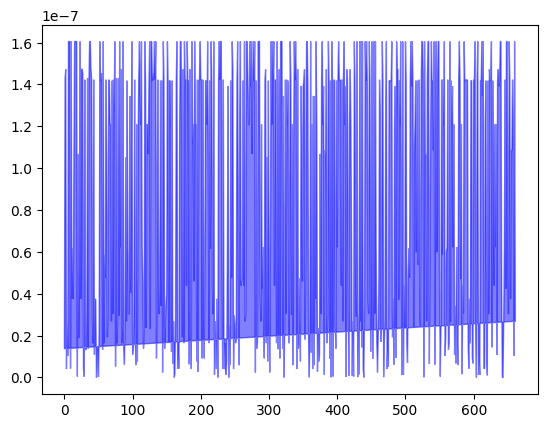

In [ ]:
#Parzen windows 
parzen = KernelDensity()
parzen.fit(X_train_pca_55)

info = parzen.score_samples(X_test_pca_55)

plt.fill(np.exp(info), c='blue', alpha=0.5)